# Must Run

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import geopy.distance
import seaborn as sns
import glob
import os
import scipy as sci
import scipy.signal as sig
import scipy.spatial as spa
import scipy.stats as stat
from collections import Counter
from IPython.display import Audio
import random
from matplotlib import rcParams
import math
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

ex = './Historical Data/%s.csv'
path = ex % 'LCM'
!wc -1 $psth

import umap
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

# Dimension reduction and clustering libraries
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
sns.set(style = 'white', context = 'notebook', rc = {'figure.figsize':(14,10)})

wc: illegal option -- 1
usage: wc [-clmw] [file ...]


# UMAP

## Overall Temperature

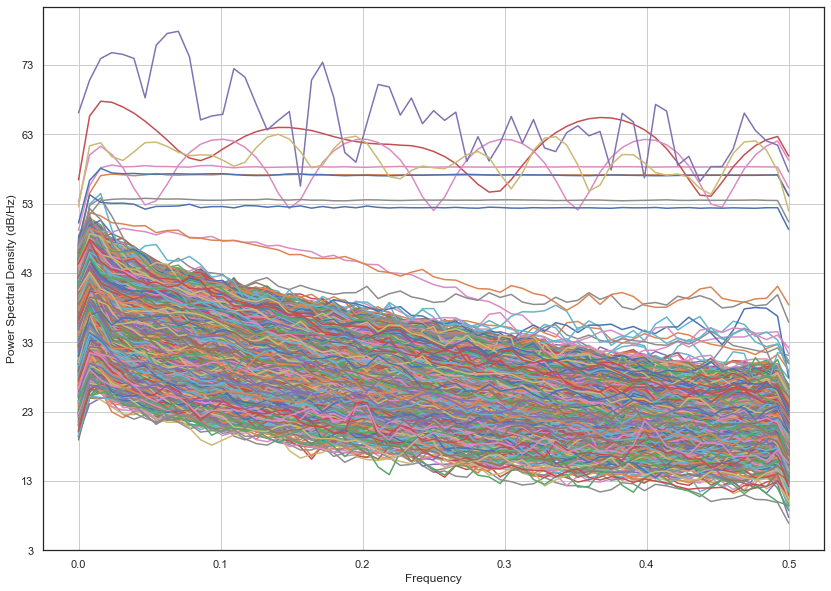

In [24]:
avgoverall = pd.read_csv('/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/avgoverall.csv', index_col = 'date')
avgoverall.index = pd.to_datetime(avgoverall.index)
overall = avgoverall.interpolate('time', limit_direction='both')
overall = pd.DataFrame(overall)
overall = overall.set_index(overall.index.year)
overall.columns = overall.columns.str.replace("[station ]","")
nfftstationsumapped = pd.DataFrame()
nfftstationsumappeddata = pd.DataFrame()
#data = detrendedsamp
data = overall
for s in range(len(data.columns)):
    nonan = data.iloc[:,s]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear')
    #a = stat.zscore(a)
    a = pd.DataFrame(a, index = b)
    base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
    xvalues = np.linspace(1,7, num = 65, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    nfftstationsumapped = pd.DataFrame(interparray, index = b, columns = [str(data.columns[s])])
    nfftstationsumappeddata = pd.concat([nfftstationsumappeddata, nfftstationsumapped], axis = 1)
um = umap.UMAP()
Y_umap = um.fit_transform(nfftstationsumappeddata.T)
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,len(nfftstationsumappeddata.columns))))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (nfftstationsumappeddata.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

## AWND

/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7035: RuntimeWarning: divide by zero encountered in log10
  line = self.plot(freqs, 10 * np.log10(pxx), **kwargs)
/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


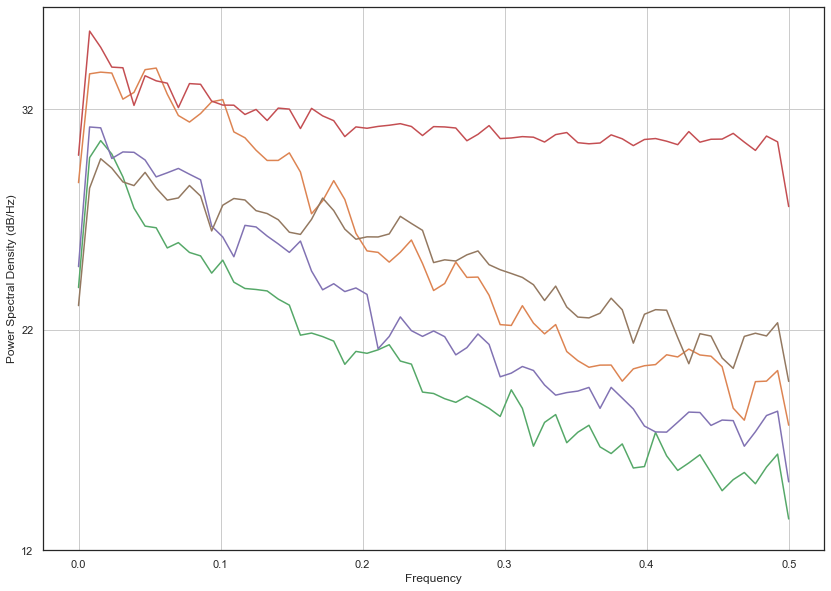

In [27]:
avgoverall = pd.read_csv('/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/awndoverall.csv', index_col = 0)
avgoverall.index = pd.to_datetime(avgoverall.index)
overall = avgoverall.interpolate('time', limit_direction='both')
overall = pd.DataFrame(overall)
overall = overall.set_index(overall.index.year)
overall.columns = overall.columns.str.replace("[station ]","")
nfftstationsumapped = pd.DataFrame()
nfftstationsumappeddata = pd.DataFrame()
#data = detrendedsamp
data = overall
for s in range(len(data.columns)):
    nonan = data.iloc[:,s]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear')
    #a = stat.zscore(a)
    a = pd.DataFrame(a, index = b)
    base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
    xvalues = np.linspace(1,7, num = 65, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    nfftstationsumapped = pd.DataFrame(interparray, index = b, columns = [str(data.columns[s])])
    nfftstationsumappeddata = pd.concat([nfftstationsumappeddata, nfftstationsumapped], axis = 1)
um = umap.UMAP()
Y_umap = um.fit_transform(nfftstationsumappeddata.T)
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,len(nfftstationsumappeddata.columns))))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (nfftstationsumappeddata.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

## Max Overall

/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


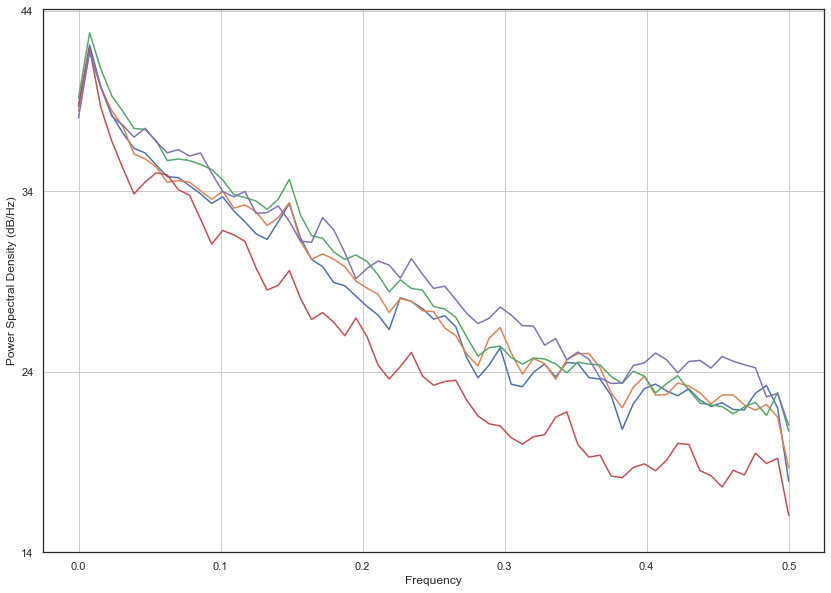

In [28]:
avgoverall = pd.read_csv('/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/maxoverall.csv', index_col = 0)
avgoverall.index = pd.to_datetime(avgoverall.index)
overall = avgoverall.interpolate('time', limit_direction='both')
overall = pd.DataFrame(overall)
overall = overall.set_index(overall.index.year)
overall.columns = overall.columns.str.replace("[station ]","")
nfftstationsumapped = pd.DataFrame()
nfftstationsumappeddata = pd.DataFrame()
#data = detrendedsamp
data = overall
for s in range(len(data.columns)):
    nonan = data.iloc[:,s]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear')
    #a = stat.zscore(a)
    a = pd.DataFrame(a, index = b)
    base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
    xvalues = np.linspace(1,7, num = 65, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    nfftstationsumapped = pd.DataFrame(interparray, index = b, columns = [str(data.columns[s])])
    nfftstationsumappeddata = pd.concat([nfftstationsumappeddata, nfftstationsumapped], axis = 1)
um = umap.UMAP()
Y_umap = um.fit_transform(nfftstationsumappeddata.T)
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,len(nfftstationsumappeddata.columns))))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (nfftstationsumappeddata.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

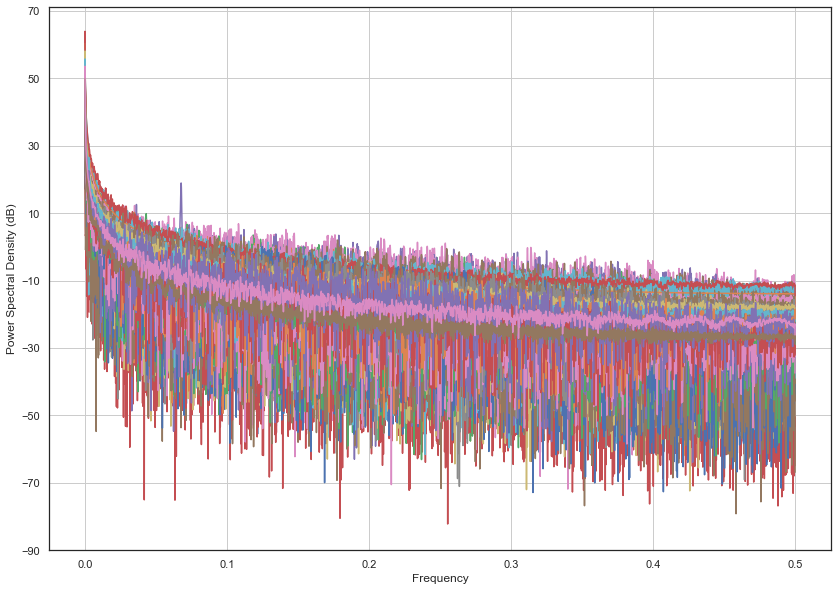

In [8]:
aphmeanumapped = pd.DataFrame()
pHdata = pd.read_csv('/Users/athenaye/Desktop/complete/tidaldata.csv', index_col = 2)
pHdata.index = pd.to_datetime(pHdata.index)
pHdata = pHdata.drop('Unnamed: 0', axis = 1)
pHdata
pHdata = pHdata[pHdata['variable'] == 'sea_level']
pHdata = pHdata.pivot(columns='siteID')[['value']]
for x in range(len(pHdata.columns)):
    nonan = pHdata[pHdata.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14, detrend = 'linear')
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aphmean = acumulative.mean(axis=(0))
bphmean = bcumulative.mean(axis=(0))
aphmean = pd.DataFrame(aphmean, index = bphmean)
base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 2**(14-1)+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
aphmean = pd.DataFrame(interparray, index = bphmean)
aphmean = aphmean/aphmean.max()
aphmeanumapped = pd.concat([aphmeanumapped, aphmean], axis = 1)

In [10]:
aphmeanumapped

0
0.000000  1.000000e+00
0.000061  1.000000e+00
0.000122  1.000000e+00
0.000183  1.000000e+00
0.000244  1.000000e+00
...                ...
0.499756  1.110070e-07
0.499817  1.037393e-07
0.499878  1.124555e-07
0.499939  1.076502e-07
0.500000  5.316226e-08

[8193 rows x 1 columns]

In [9]:
um = umap.UMAP()
Y_umap = um.fit_transform(aphmeanumapped.T)
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,len(aphmeanumapped.columns))))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (aphmeanumapped.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [13]:
def toumap(filepath, variableindicator, officialname, nfft):
    aphmeanumapped = pd.DataFrame()
    for t in range(len(filepath)):
        try:
            pHdata = pd.read_csv(filepath[t], index_col = 2)
            pHdata.index = pd.to_datetime(pHdata.index)
            pHdata = pHdata.drop('Unnamed: 0', axis = 1)
            pHdata
            pHdata = pHdata[pHdata['variable'] == variableindicator[t]]
            pHdata = pHdata.pivot(columns='siteID')[['value']]
            for x in range(len(pHdata.columns)):
                nonan = pHdata[pHdata.columns[x]]
                nonan = nonan.interpolate('time', limit_direction='both')
                a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**nfft, detrend = 'linear')
                if x == 0:
                    acumulative = a
                    bcumulative = b
                else:
                    acumulative = np.vstack([acumulative, a])
                    bcumulative = np.vstack([bcumulative, b])
            aphmean = acumulative.mean(axis=(0))
            bphmean = bcumulative.mean(axis=(0))
            aphmean = pd.DataFrame(aphmean, index = bphmean)
            base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
            xvalues = np.linspace(1,nfft-1, num = 2**(nfft-1)+1, endpoint = True)
            xvalues = xvalues[::-1]
            xvalues = 2**xvalues
            interparray = base(xvalues)
            aphmean = pd.DataFrame(interparray, index = bphmean, columns = [officialname[t]])
            aphmean = aphmean/aphmean.max()
            aphmeanumapped = pd.concat([aphmeanumapped, aphmean], axis = 1)
        except:
            avgoverall = pd.read_csv(filepath[t], index_col = 0)
            avgoverall.index = pd.to_datetime(avgoverall.index)
            avgoverallsamp = avgoverall.iloc[:,0:50]
            for x in range(len(avgoverallsamp.columns)):
                nonan = avgoverallsamp[avgoverallsamp.columns[x]]
                nonan = nonan.interpolate('linear', limit_direction = 'both')
                a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfft, detrend = 'linear')
                if x == 0:
                    ameancumulative = a
                    bmeancumulative = b
                else:
                    ameancumulative = np.vstack([ameancumulative, a])
                    bmeancumulative = np.vstack([bmeancumulative, b])
            amean = ameancumulative.mean(axis=(0))
            bmean = bmeancumulative.mean(axis=(0))
            amean = pd.DataFrame(amean, index = bmean)
            base = sci.interpolate.interp1d(1/amean.index[1:],amean.iloc[1:,0], kind = 'nearest')
            xvalues = np.linspace(1,nfft-1, num = 2**(nfft-1)+1, endpoint = True)
            xvalues = xvalues[::-1]
            xvalues = 2**xvalues
            interparray = base(xvalues)
            a14mean = pd.DataFrame(interparray, index = bmean, columns = [officialname[t]])
            a14mean = a14mean/a14mean.max()
            aphmeanumapped = pd.concat([aphmeanumapped, aphmean], axis = 1)
    aphmeanumapped.to_csv('/Users/athenaye/Desktop/umap.csv')

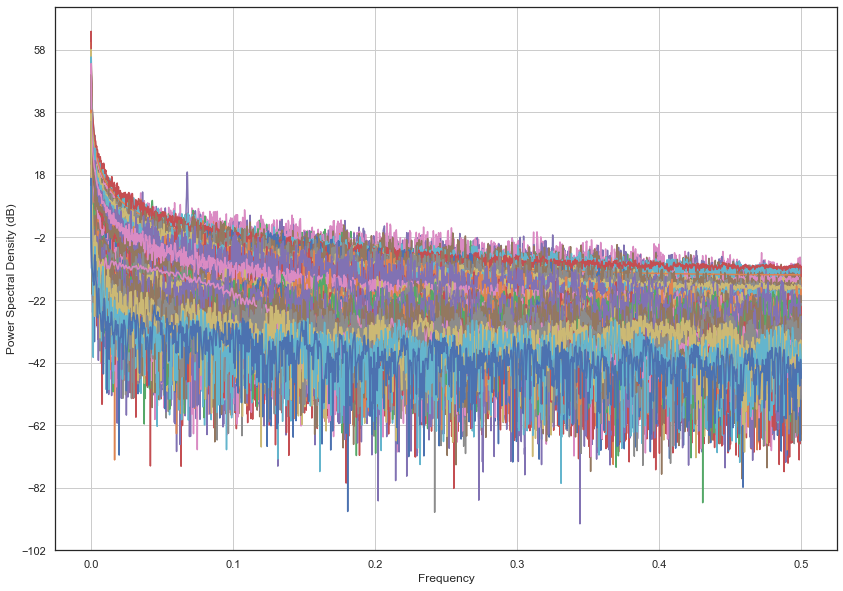

In [16]:
toumap(['/Users/athenaye/Desktop/complete/tidaldata.csv',
    '/Users/athenaye/Desktop/complete/PARMean.csv'],
          [ 'sea_level','PARMean'],
            ['tidal','Mean of Photosynthetically Active Radiation'],14)

In [17]:
hi = pd.read_csv('/Users/athenaye/Desktop/umap.csv', index_col = 0)
hi

tidal  Mean of Photosynthetically Active Radiation
0.000000  1.000000e+00                                     1.000000
0.000061  1.000000e+00                                     1.000000
0.000122  1.000000e+00                                     1.000000
0.000183  1.000000e+00                                     1.000000
0.000244  1.000000e+00                                     1.000000
...                ...                                          ...
0.499756  1.110070e-07                                     0.000009
0.499817  1.037393e-07                                     0.000008
0.499878  1.124555e-07                                     0.000008
0.499939  1.076502e-07                                     0.000008
0.500000  5.316226e-08                                     0.000005

[8193 rows x 2 columns]

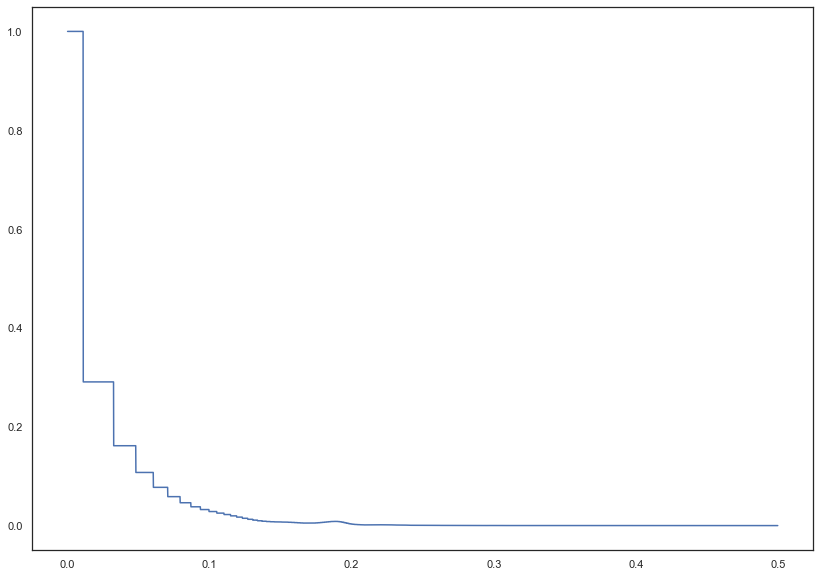

In [18]:
plt.plot(hi.iloc[:,1])

In [19]:
um = umap.UMAP()
Y_umap = um.fit_transform(hi.T)
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,len(hi.columns))))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (hi.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:132: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 0 edges.
It has fully disconnected 2 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


ValueError: zero-size array to reduction operation maximum which has no identity

In [21]:
umap.utils.disconnected_vertices(hi)

TypeError:                  tidal  Mean of Photosynthetically Active Radiation
0.000000  1.000000e+00                                     1.000000
0.000061  1.000000e+00                                     1.000000
0.000122  1.000000e+00                                     1.000000
0.000183  1.000000e+00                                     1.000000
0.000244  1.000000e+00                                     1.000000
...                ...                                          ...
0.499756  1.110070e-07                                     0.000009
0.499817  1.037393e-07                                     0.000008
0.499878  1.124555e-07                                     0.000008
0.499939  1.076502e-07                                     0.000008
0.500000  5.316226e-08                                     0.000005

[8193 rows x 2 columns] is not an estimator instance.

# Bird

In [2]:
#upload pollen dataset as csv
pmm = pd.read_csv('./PollenandBird/minimalbirddata.csv')
pmm = pmm.set_index('tag-local-identifier')

### Function

In [3]:
def birddist(tagname):
    sixsixtyone = pd.DataFrame()
    for x in range(len(pmm.index)):
        if pmm.index[x] == tagname:
            sixsixtyone = pd.concat([sixsixtyone, pmm.iloc[x]], axis = 1)
    sixsixtyone = sixsixtyone.T
    sixsixtyone['Date'] = pd.to_datetime(sixsixtyone['Date'])
    sixsixtyone = sixsixtyone.set_index('Date')
    sixsixtyone['location-longint'] = sixsixtyone['location-long'].astype(str).astype(float)
    sixsixtyone['location-latint'] = sixsixtyone['location-lat'].astype(str).astype(float)

    #group 659
    groupedsixsixtyone = sixsixtyone.groupby('Date')['location-longint','location-latint'].mean()
    groupedsixsixtyone['MeanCoordinates']  = list(zip(groupedsixsixtyone['location-latint'], groupedsixsixtyone['location-longint']))

    #Make a plot for distance per day
    distperdayarr = np.empty(len(groupedsixsixtyone))
    for x in range(len(groupedsixsixtyone)):
        coord1 = groupedsixsixtyone['MeanCoordinates'].iloc[x]
        coord2 = groupedsixsixtyone['MeanCoordinates'].iloc[x-1]
        distperdayarr[x] = geopy.distance.distance(coord1, coord2).km
    distperday = pd.DataFrame(distperdayarr)
    distperday = distperday.set_index(groupedsixsixtyone.index)
    fig, (ax1, ax2) = plt.subplots(2)
    figure = ax1.plot(distperday)
    
    #PSD of distance per day with an NFFT of 2^8, with plt.psd() detrending the data
    a, b = ax2.psd(distperday, Fs = 1, scale_by_freq = False, NFFT = 2**8, detrend = 'linear')
    distperdaydata = a
    distperdayindex = b
    zdistperdayinmeeting = stat.zscore(distperdaydata)
    return distperday, figure, a, b;

<ipython-input-3-7037d8010a9c>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupedsixsixtyone = sixsixtyone.groupby('Date')['location-longint','location-latint'].mean()


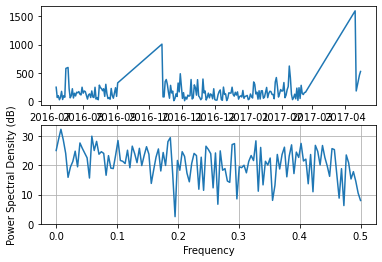

In [4]:
distperday, figure, a, b= birddist('Z660')

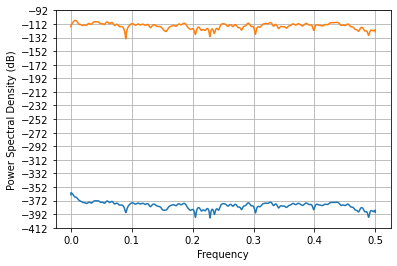

In [5]:
#Detrending distance per day with sig.detrend()
dtdistperday = sig.detrend(distperday)
dtdistperday = pd.DataFrame(dtdistperday)
dtadistperday,dtbdistperday = plt.psd(dtdistperday, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue

#Z-scored data of dist per day with sig.detrend()
zdistperday = stat.zscore(dtdistperday)
zdistperday = pd.DataFrame(zdistperday)
zadistperday,zbdistperday = plt.psd(zdistperday, Fs = 1, scale_by_freq = False, NFFT = 2**14 )

# Pollen

In [6]:
pollen = pd.read_csv('./PollenandBird/pollen.csv', index_col = 'Date')
pollen = pollen.sort_index()
pollen = pollen['1998-01-01':'2018-12-31']
simple = pollen.set_index(np.array(range(0,6145)))

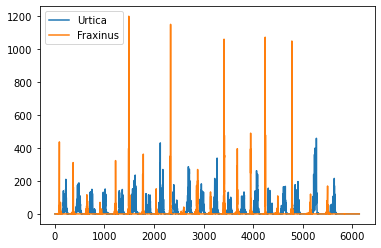

In [7]:
#plotting two very different pollen genuses
plt.plot(simple['Urtica'])
plt.plot(simple['Fraxinus'])
plt.legend(('Urtica','Fraxinus'), loc="upper left")

([<matplotlib.axis.XTick at 0x7fe266578c10>,
 [Text(0, 0, '1992'), Text(7784, 0, '2018')])

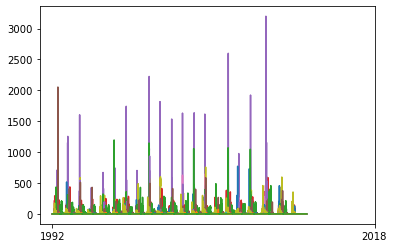

In [8]:
#Pollen Graph
plt.plot(simple)
plt.xticks((0,7784), (1992,2018))

In [9]:
#Pollen Mean
pollenmean=pollen.mean(axis=(1))
pollenmean

Date
1998-01-01    0.000000
1998-01-02    0.000000
1998-01-03    0.000000
1998-01-04    0.000000
1998-01-05    0.000000
                ...   
2018-12-27    0.000000
2018-12-28    0.121212
2018-12-29    0.000000
2018-12-30    0.000000
2018-12-31    0.000000
Length: 6145, dtype: float64

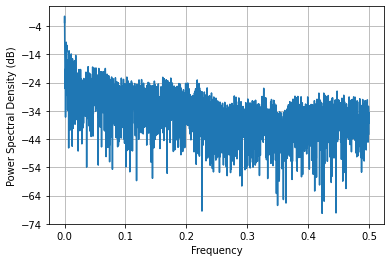

In [10]:
#PSD of pollen mean with an NFFT of 2^14
a, b = plt.psd(pollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**14)
pollenmeandata = a
pollenmeanindex = b

### Detrended and Z-Score  Pollen

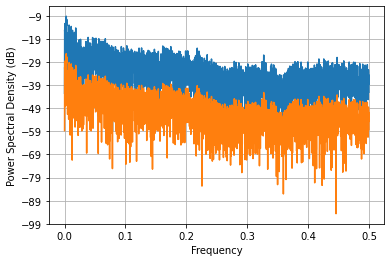

In [11]:
dtpollenmean = sig.detrend(pollenmean)
dtpollenmean = pd.DataFrame(dtpollenmean)
dtapollenmean,dtbpollenmean = plt.psd(dtpollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue
zpollenmean = stat.zscore(dtpollenmean)
zpollenmean = pd.DataFrame(zpollenmean)
zapollenmean,zbpollenmean = plt.psd(zpollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in orange

## All Pollen

In [12]:
urtica = simple['Urtica']
frax = simple['Fraxinus']
frax.index = pollen.index

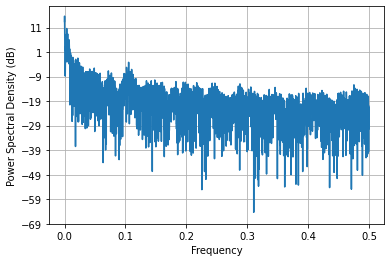

In [13]:
#PSD of Urtica
a, b = plt.psd(urtica, Fs = 1, scale_by_freq = False, NFFT = 2**14)
urticadata = a
urticaindex = b

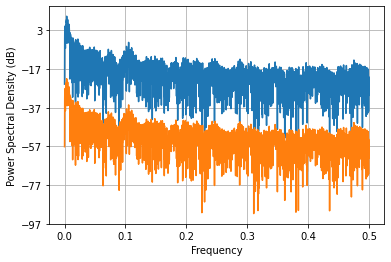

In [14]:
#Detrended Urtica
dturtica = sig.detrend(urtica)
dturtica = pd.DataFrame(dturtica)
dtaurtica,dtburtica = plt.psd(dturtica, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue

#Z-scored Urtica
zurtica = stat.zscore(dturtica)
zurtica = pd.DataFrame(zurtica)
zaurtica,zburtica = plt.psd(zurtica, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in orange

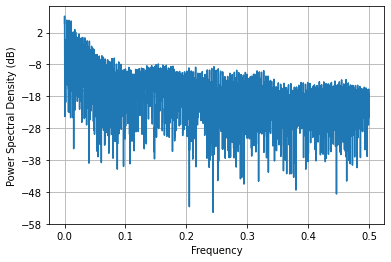

In [15]:
#PSD of frax
a, b = plt.psd(frax, Fs = 1, scale_by_freq = False, NFFT = 2**14)
fraxdata = a
fraxindex = b

In [16]:
frax

Date
1998-01-01    0
1998-01-02    0
1998-01-03    0
1998-01-04    0
1998-01-05    0
             ..
2018-12-27    0
2018-12-28    0
2018-12-29    0
2018-12-30    0
2018-12-31    0
Name: Fraxinus, Length: 6145, dtype: int64

write a function that accepts wideform data and spits out a vector of period and power, test on noaa and on neon, make an argument for LF or WF
write another function that makes a lineplot
and a heatmap

In [4]:
pHdata = pd.read_csv('/Users/athenaye/Desktop/Complete Data/localDissolvedOxygenSat.csv', index_col = 'startDateTime')
pHdata.index = pd.to_datetime(pHdata.index)
pHdata = pHdata.drop('Unnamed: 0', axis = 1)
pHdata
pHdata = pHdata[pHdata['variable'] == 'localDissolvedOxygenSat']
pHdata = pHdata.pivot(columns='siteID')[['value']]

pHdata.to_csv('/Users/athenaye/Desktop/localDissolvedOxygenSat.csv')

In [68]:
pHdata = pd.read_csv('/Users/athenaye/Desktop/complete/waterTemp.csv', index_col = 2)
pHdata

Unnamed: 0 siteID   variable      value
date                                               
2016-07-27           0   TOOK  waterTemp   8.637143
2016-08-10           1   TOOK  waterTemp   8.397368
2016-09-10           2   TOOK  waterTemp   7.095000
2016-11-07           3   TOOK  waterTemp   1.325000
2016-12-07           4   TOOK  waterTemp   1.266667
...                ...    ...        ...        ...
2021-12-06         110   BARC  waterTemp  14.290000
2022-01-11         111   BARC  waterTemp  14.900000
2022-01-31         112   BARC  waterTemp  10.040000
2022-02-16         113   BARC  waterTemp  11.930000
2022-03-02         114   BARC  waterTemp  16.270000

[1075 rows x 4 columns]

In [109]:
pHdata = pd.read_csv('/Users/athenaye/Desktop/tidal.csv')
pHdata = pHdata.drop(0)
#pHdata = pHdata.set_index('time')
#pHdata.index = pd.to_datetime(pHdata.index)


# # Set the index of the DataFrame to the country name
# 
# data_with_index.head()

/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
pHdata

sea_level                  time latitude longitude station_name  \
1            908  2012-03-24T12:00:00Z    6.978   158.197      Pohnpei   
2            906  2012-03-25T12:00:00Z    6.978   158.197      Pohnpei   
3            902  2012-03-26T12:00:00Z    6.978   158.197      Pohnpei   
4            914  2012-03-27T12:00:00Z    6.978   158.197      Pohnpei   
5            911  2012-03-28T12:00:00Z    6.978   158.197      Pohnpei   
...          ...                   ...      ...       ...          ...   
800871       NaN  2019-05-10T12:00:00Z   25.297    60.603     Chabahar   
800872      1408  2019-05-11T12:00:00Z   25.297    60.603     Chabahar   
800873      1513  2019-05-12T12:00:00Z   25.297    60.603     Chabahar   
800874      1635  2019-05-13T12:00:00Z   25.297    60.603     Chabahar   
800875      1633  2019-05-14T12:00:00Z   25.297    60.603     Chabahar   

                         station_country  station_country_code  record_id  \
1       Micronesia (Federated States of)                 583.0       10.0   
2       Micronesia (Federated States of)                 583.0       10.0   
3       Micronesia (Federated States of)                 583.0       10.0   
4       Micronesia (Federated States of)                 583.0       10.0   
5       Micronesia (Federated States of)                 583.0       10.0   
...                                  ...                   ...        ...   
800871        Iran (Islamic Republic of)                 364.0     9150.0   
800872        Iran (Islamic Republic of)                 364.0     9150.0   
800873        Iran (Islamic Republic of)                 364.0     9150.0   
800874        Iran (Islamic Republic of)                 364.0     9150.0   
800875        Iran (Islamic Republic of)                 364.0     9150.0   

        uhslc_id  gloss_id ssc_id          last_rq_date  
1            1.0     115.0   deke  2018-12-31T12:00:00Z  
2            1.0     115.0   deke  2018-12-31T12:00:00Z  
3            1.0     115.0   deke  2018-12-31T12:00:00Z  
4            1.0     115.0   deke  2018-12-31T12:00:00Z  
5            1.0     115.0   deke  2018-12-31T12:00:00Z  
...          ...       ...    ...                   ...  
800871     915.0     337.0   chab  2016-12-31T12:00:00Z  
800872     915.0     337.0   chab  2016-12-31T12:00:00Z  
800873     915.0     337.0   chab  2016-12-31T12:00:00Z  
800874     915.0     337.0   chab  2016-12-31T12:00:00Z  
800875     915.0     337.0   chab  2016-12-31T12:00:00Z  

[800875 rows x 12 columns]

In [ ]:
Min and max of each day
calculate difference

In [111]:
pHdata['time'] = pHdata['time'].astype(str)
intermediatelist = pHdata["time"].str.split('T12:00', n= -1, expand=True)
pHdata["time"] = intermediatelist[0]
pHdata[["siteID"]] = pHdata[['station_name']]

df = pd.DataFrame(pHdata[['siteID', 'time', 'sea_level']])
df[['sea_level']] = df[['sea_level']].astype(float)
df = df.groupby(['siteID','time'], as_index=False).mean()
df = pd.melt(df, id_vars=['siteID','time'], value_vars=['sea_level'])
df.to_csv('/Users/athenaye/Desktop/complete/tidaldata.csv')

In [149]:
hi = pd.read_csv('/Users/athenaye/Desktop/complete/tidaldata.csv')
listofsites = hi[['siteID']].drop_duplicates()
hi.index = hi['time']
hi = hi.drop(['Unnamed: 0','time','variable'], axis = 1)


In [148]:
listofsites

[              siteID
 0           Abashiri
 3659        Aburatsu
 7318        Acajutla
 10947   Adak, Alaska
 14576           Aden
 ...              ...
 783290    Walvis Bay
 784735    Wellington
 788395   Yakutat, AK
 792024           Yap
 795573      Zanzibar
 
 [237 rows x 1 columns]]

In [150]:
def toheatmap(filepath, variableindicator, officialname, nfft):
    masteramean = pd.DataFrame()
    for t in range(len(filepath)):
        try:
            pHdata = pd.read_csv(filepath[t], index_col = 2)
            pHdata.index = pd.to_datetime(pHdata.index)
            pHdata = pHdata.drop('Unnamed: 0', axis = 1)
            pHdata
            pHdata = pHdata[pHdata['variable'] == variableindicator[t]]
            pHdata = pHdata.pivot(columns='siteID')[['value']]
            for x in range(len(pHdata.columns)):
                nonan = pHdata[pHdata.columns[x]]
                nonan = nonan.interpolate('time', limit_direction='both')
                a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**nfft, detrend = 'linear')
                if x == 0:
                    acumulative = a
                    bcumulative = b
                else:
                    acumulative = np.vstack([acumulative, a])
                    bcumulative = np.vstack([bcumulative, b])
            aphmean = acumulative.mean(axis=(0))
            bphmean = bcumulative.mean(axis=(0))
            aphmean = pd.DataFrame(aphmean, index = bphmean)
            base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
            xvalues = np.linspace(1,nfft-1, num = 2**(nfft-1)+1, endpoint = True)
            xvalues = xvalues[::-1]
            xvalues = 2**xvalues
            interparray = base(xvalues)
            aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
            aphmean = aphmean/aphmean.max()
            masteramean = pd.concat([masteramean, aphmean], axis = 1)
        except:
            avgoverall = pd.read_csv(filepath[t], index_col = 0)
            avgoverall.index = pd.to_datetime(avgoverall.index)
            avgoverallsamp = avgoverall.iloc[:,0:50]
            for x in range(len(avgoverallsamp.columns)):
                nonan = avgoverallsamp[avgoverallsamp.columns[x]]
                nonan = nonan.interpolate('linear', limit_direction = 'both')
                a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfft, detrend = 'linear')
                if x == 0:
                    ameancumulative = a
                    bmeancumulative = b
                else:
                    ameancumulative = np.vstack([ameancumulative, a])
                    bmeancumulative = np.vstack([bmeancumulative, b])
            amean = ameancumulative.mean(axis=(0))
            bmean = bmeancumulative.mean(axis=(0))
            amean = pd.DataFrame(amean, index = bmean)
            base = sci.interpolate.interp1d(1/amean.index[1:],amean.iloc[1:,0], kind = 'nearest')
            xvalues = np.linspace(1,nfft-1, num = 2**(nfft-1)+1, endpoint = True)
            xvalues = xvalues[::-1]
            xvalues = 2**xvalues
            interparray = base(xvalues)
            a14mean = pd.DataFrame(interparray, index = 1/bmean, columns = [officialname[t]])
            a14mean = a14mean/a14mean.max()
            masteramean = pd.concat([masteramean, a14mean], axis = 1)
    yvalues = np.array(range(0,2**(nfft-1)+1))
    xtickmarks = [2, 4,8,16,32,64,128,256,365, 365*2, 365*4, 365*8, 365*16, 8192]

    x = xvalues
    y = yvalues
    f = sci.interpolate.interp1d(x, y)
    xtickmarks = xtickmarks[0:nfft]
    xnew = xtickmarks #Starting period, ending period, interval of jump
    ynew = f(xnew) # use interpolation function returned by `interp1d`
    rcParams['figure.figsize'] = 11.7,16.27
    s = sns.heatmap(np.log(masteramean.T), cbar_kws={'label': 'Log of Power Spectral Density'})
    s.set_title('Power Spectral Density')
    #s.set_xscale("log", base = 2)
    s.set_xlabel('Period (days)') 
    locs, labels = plt.xticks()
    newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d']
    plt.xticks(ynew,newlabel)

In [152]:
tidal = pd.read_csv('/Users/athenaye/Desktop/complete/tidaldata.csv')

In [153]:
tidal

Unnamed: 0    siteID        time   variable   value
0                0  Abashiri  2012-03-24  sea_level  1516.0
1                1  Abashiri  2012-03-25  sea_level  1486.0
2                2  Abashiri  2012-03-26  sea_level  1419.0
3                3  Abashiri  2012-03-27  sea_level  1354.0
4                4  Abashiri  2012-03-28  sea_level  1364.0
...            ...       ...         ...        ...     ...
799197      799197  Zanzibar  2022-02-24  sea_level  2280.0
799198      799198  Zanzibar  2022-02-25  sea_level  2117.0
799199      799199  Zanzibar  2022-02-26  sea_level  2104.0
799200      799200  Zanzibar  2022-02-27  sea_level  2115.0
799201      799201  Zanzibar  2022-02-28  sea_level  2125.0

[799202 rows x 5 columns]

<ipython-input-141-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-141-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-141-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-141-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-141-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-141-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide


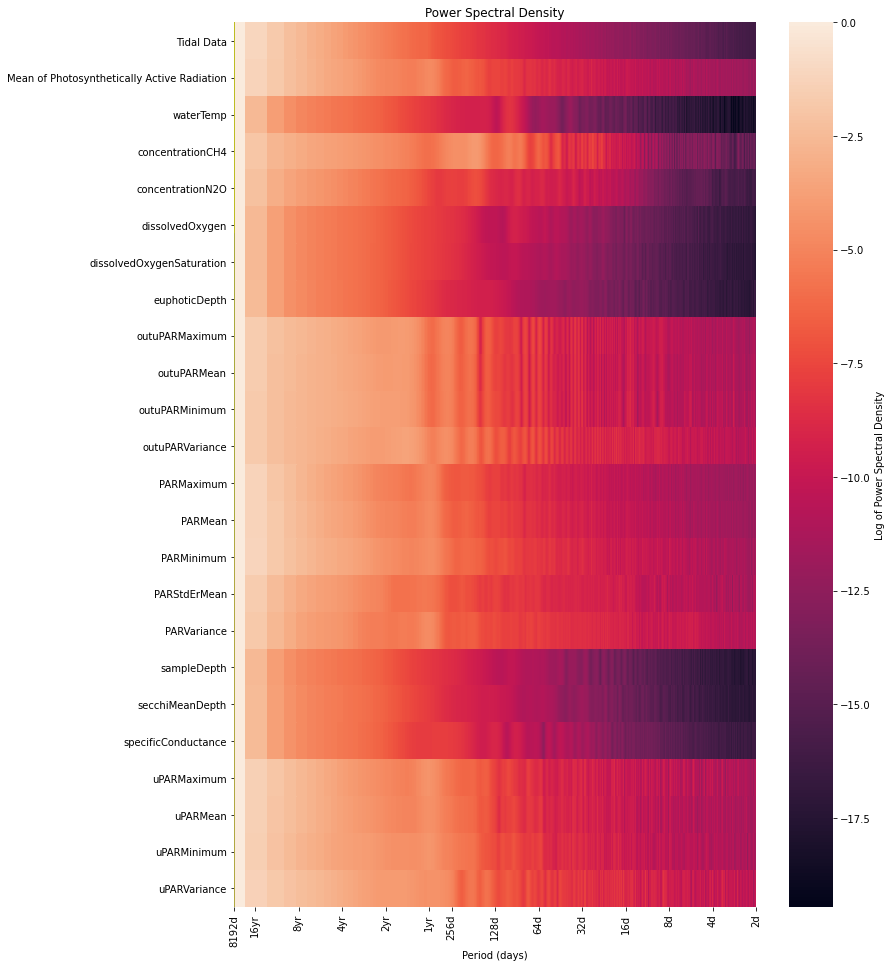

In [142]:
toheatmap([
    '/Users/athenaye/Desktop/complete/tidaldata.csv',
    '/Users/athenaye/Desktop/complete/PARMean.csv',
    '/Users/athenaye/Desktop/complete/waterTemp.csv',
'/Users/athenaye/Desktop/complete/concentrationCH4.csv',
'/Users/athenaye/Desktop/complete/concentrationN2O.csv',
'/Users/athenaye/Desktop/complete/dissolvedOxygen.csv',
'/Users/athenaye/Desktop/complete/dissolvedOxygenSaturation.csv',
'/Users/athenaye/Desktop/complete/euphoticDepth.csv',
'/Users/athenaye/Desktop/complete/outuPARMaximum.csv',
'/Users/athenaye/Desktop/complete/outuPARMean.csv',
'/Users/athenaye/Desktop/complete/outuPARMinimum.csv',
'/Users/athenaye/Desktop/complete/outuPARVariance.csv',
'/Users/athenaye/Desktop/complete/PARMaximum.csv',
'/Users/athenaye/Desktop/complete/PARMean.csv',
'/Users/athenaye/Desktop/complete/PARMinimum.csv',
'/Users/athenaye/Desktop/complete/PARStdErMean.csv',
'/Users/athenaye/Desktop/complete/PARVariance.csv',
'/Users/athenaye/Desktop/complete/sampleDepth.csv',
'/Users/athenaye/Desktop/complete/secchiMeanDepth.csv',
'/Users/athenaye/Desktop/complete/specificConductance.csv',
'/Users/athenaye/Desktop/complete/uPARMaximum.csv',
'/Users/athenaye/Desktop/complete/uPARMean.csv',
'/Users/athenaye/Desktop/complete/uPARMinimum.csv',
'/Users/athenaye/Desktop/complete/uPARVariance.csv'],
          ['sea_level', 'PARMean','waterTemp',
'concentrationCH4',
'concentrationN2O',
'dissolvedOxygen',
'dissolvedOxygenSaturation',
'euphoticDepth',
'outuPARMaximum',
'outuPARMean',
'outuPARMinimum',
'outuPARVariance',
'PARMaximum',
'PARMean',
'PARMinimum',
'PARStdErMean',
'PARVariance',
'sampleDepth',
'secchiMeanDepth',
'specificConductance',
'uPARMaximum',
'uPARMean',
'uPARMinimum',
'uPARVariance'],
            ['Tidal Data','Mean of Photosynthetically Active Radiation','waterTemp',
'concentrationCH4',
'concentrationN2O',
'dissolvedOxygen',
'dissolvedOxygenSaturation',
'euphoticDepth',
'outuPARMaximum',
'outuPARMean',
'outuPARMinimum',
'outuPARVariance',
'PARMaximum',
'PARMean',
'PARMinimum',
'PARStdErMean',
'PARVariance',
'sampleDepth',
'secchiMeanDepth',
'specificConductance',
'uPARMaximum',
'uPARMean',
'uPARMinimum',
'uPARVariance'],14)

<ipython-input-150-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-150-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-150-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-150-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-150-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-150-4d9b3c03b8fe>:29: RuntimeWarning: divide by zero encountered in true_divide


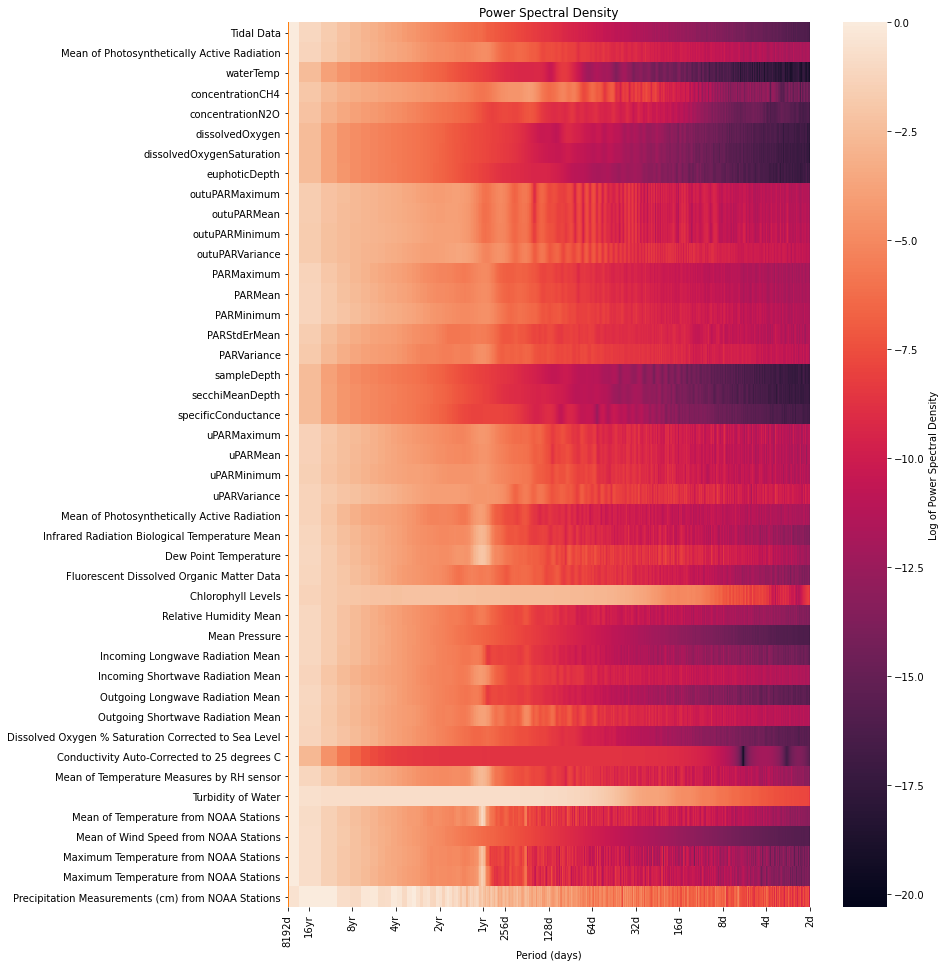

In [151]:
toheatmap(['/Users/athenaye/Desktop/complete/tidaldata.csv',
    '/Users/athenaye/Desktop/complete/PARMean.csv',
    '/Users/athenaye/Desktop/complete/waterTemp.csv',
'/Users/athenaye/Desktop/complete/concentrationCH4.csv',
'/Users/athenaye/Desktop/complete/concentrationN2O.csv',
'/Users/athenaye/Desktop/complete/dissolvedOxygen.csv',
'/Users/athenaye/Desktop/complete/dissolvedOxygenSaturation.csv',
'/Users/athenaye/Desktop/complete/euphoticDepth.csv',
'/Users/athenaye/Desktop/complete/outuPARMaximum.csv',
'/Users/athenaye/Desktop/complete/outuPARMean.csv',
'/Users/athenaye/Desktop/complete/outuPARMinimum.csv',
'/Users/athenaye/Desktop/complete/outuPARVariance.csv',
'/Users/athenaye/Desktop/complete/PARMaximum.csv',
'/Users/athenaye/Desktop/complete/PARMean.csv',
'/Users/athenaye/Desktop/complete/PARMinimum.csv',
'/Users/athenaye/Desktop/complete/PARStdErMean.csv',
'/Users/athenaye/Desktop/complete/PARVariance.csv',
'/Users/athenaye/Desktop/complete/sampleDepth.csv',
'/Users/athenaye/Desktop/complete/secchiMeanDepth.csv',
'/Users/athenaye/Desktop/complete/specificConductance.csv',
'/Users/athenaye/Desktop/complete/uPARMaximum.csv',
'/Users/athenaye/Desktop/complete/uPARMean.csv',
'/Users/athenaye/Desktop/complete/uPARMinimum.csv',
'/Users/athenaye/Desktop/complete/uPARVariance.csv',  '/Users/athenaye/Desktop/Complete Data/PARMean.csv',
           '/Users/athenaye/Desktop/Complete Data/bioTempMean.csv',
           '/Users/athenaye/Desktop/Complete Data/dewTempMean.csv',
           '/Users/athenaye/Desktop/Complete Data/fDOM.csv',
           '/Users/athenaye/Desktop/Complete Data/chlorophyll.csv',
           '/Users/athenaye/Desktop/Complete Data/RHMean.csv',
           '/Users/athenaye/Desktop/Complete Data/staPresMean.csv',
           #'/Users/athenaye/Desktop/Complete Data/chlaRelativeFluorescence.csv',
           '/Users/athenaye/Desktop/Complete Data/inLWMean.csv',
           '/Users/athenaye/Desktop/Complete Data/inSWMean.csv',
           #'/Users/athenaye/Desktop/Complete Data/localDissolvedOxygenSat.csv',
           '/Users/athenaye/Desktop/Complete Data/outLWMean.csv',
           '/Users/athenaye/Desktop/Complete Data/outSWMean.csv',
           '/Users/athenaye/Desktop/Complete Data/seaLevelDissolvedOxygenSat.csv',
           '/Users/athenaye/Desktop/Complete Data/specificConductance.csv',
           '/Users/athenaye/Desktop/Complete Data/tempRHMean.csv',
            '/Users/athenaye/Desktop/Complete Data/turbidity.csv',
         '/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/avgoverall.csv',
           '/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/awndoverall.csv',
           '/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/maxoverall.csv',
           '/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/minoverall.csv',
           '/Users/athenaye/Documents/GitHub/Historical-Data/PollenandBird/prcpoverall.csv',
#             '/Users/athenaye/Desktop/complete/initialStageHeight.csv', 
#             '/Users/athenaye/Desktop/complete/endStageHeight.csv',
#             '/Users/athenaye/Desktop/complete/streamStage.csv', 
#             '/Users/athenaye/Desktop/complete/totalDischarge.csv'
],
          ['sea_level', 'PARMean','waterTemp',
'concentrationCH4',
'concentrationN2O',
'dissolvedOxygen',
'dissolvedOxygenSaturation',
'euphoticDepth',
'outuPARMaximum',
'outuPARMean',
'outuPARMinimum',
'outuPARVariance',
'PARMaximum',
'PARMean',
'PARMinimum',
'PARStdErMean',
'PARVariance',
'sampleDepth',
'secchiMeanDepth',
'specificConductance',
'uPARMaximum',
'uPARMean',
'uPARMinimum',
'uPARVariance','PARMean','bioTempMean', 'dewTempMean', 'fDOM','chlorophyll','RHMean','staPresMean',
          #'chlaRelativeFluorescence', 
           'inLWMean', 'inSWMean', 
          # 'localDissolvedOxygenSat', 
           'outLWMean', 'outSWMean', 
           'seaLevelDissolvedOxygenSat', 'specificConductance', 'tempRHMean', 
              'turbidity',
           'avgoverall', 'awndoverall', 'maxoverall', 
          'minoverall', 'prcpoverall',
#            'initialStageHeight.csv', 
#             'endStageHeight',
#             'streamStage', 
#             'totalDischarge'
          ],
            ['Tidal Data','Mean of Photosynthetically Active Radiation','waterTemp',
'concentrationCH4',
'concentrationN2O',
'dissolvedOxygen',
'dissolvedOxygenSaturation',
'euphoticDepth',
'outuPARMaximum',
'outuPARMean',
'outuPARMinimum',
'outuPARVariance',
'PARMaximum',
'PARMean',
'PARMinimum',
'PARStdErMean',
'PARVariance',
'sampleDepth',
'secchiMeanDepth',
'specificConductance',
'uPARMaximum',
'uPARMean',
'uPARMinimum',
'uPARVariance','Mean of Photosynthetically Active Radiation', 'Infrared Radiation Biological Temperature Mean', 'Dew Point Temperature', 'Fluorescent Dissolved Organic Matter Data', 'Chlorophyll Levels','Relative Humidity Mean',
             'Mean Pressure', 
             #'Fluorescence Response to Chlorophyll ', 
             'Incoming Longwave Radiation Mean', 'Incoming Shortwave Radiation Mean', 
             #'Dissolved Oxygen % Saturation at Local Conditions', 
             'Outgoing Longwave Radiation Mean', 
             'Outgoing Shortwave Radiation Mean', 'Dissolved Oxygen % Saturation Corrected to Sea Level', 'Conductivity Auto-Corrected to 25 degrees C', 'Mean of Temperature Measures by RH sensor',
              'Turbidity of Water',
           'Mean of Temperature from NOAA Stations', 'Mean of Wind Speed from NOAA Stations', 'Maximum Temperature from NOAA Stations', 
          'Maximum Temperature from NOAA Stations', 'Precipitation Measurements (cm) from NOAA Stations',
#              'initialStageHeight.csv', 
#             'endStageHeight',
#             'streamStage', 
#             'totalDischarge'
            ],14)

<ipython-input-54-71bc61375c4b>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-54-71bc61375c4b>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-54-71bc61375c4b>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-54-71bc61375c4b>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-54-71bc61375c4b>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = [officialname[t]])
<ipython-input-54-71bc61375c4b>:29: RuntimeWarning: divide by zero encountered in true_divide
  aphm

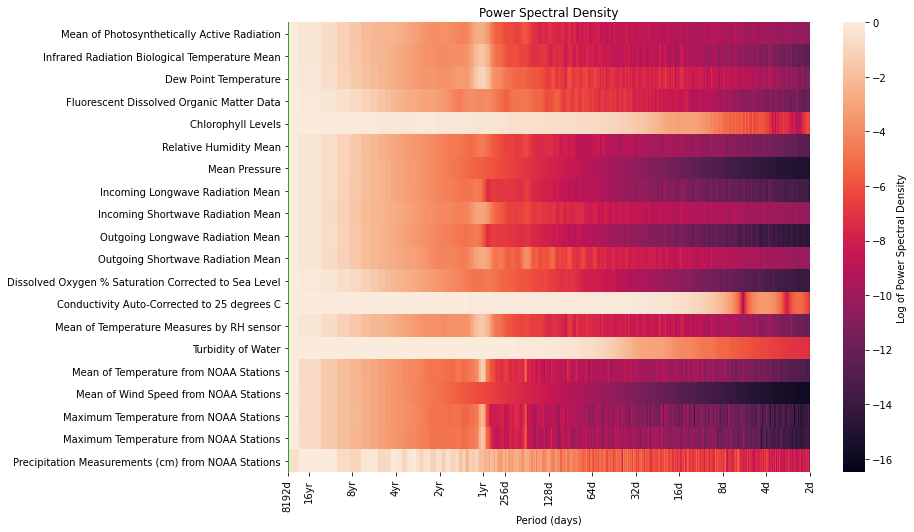

In [62]:
toheatmap([
    '/Users/athenaye/Desktop/Complete Data/PARMean.csv',
           '/Users/athenaye/Desktop/Complete Data/bioTempMean.csv',
           '/Users/athenaye/Desktop/Complete Data/dewTempMean.csv',
           '/Users/athenaye/Desktop/Complete Data/fDOM.csv',
           '/Users/athenaye/Desktop/Complete Data/chlorophyll.csv',
           '/Users/athenaye/Desktop/Complete Data/RHMean.csv',
           '/Users/athenaye/Desktop/Complete Data/staPresMean.csv',
           #'/Users/athenaye/Desktop/Complete Data/chlaRelativeFluorescence.csv',
           '/Users/athenaye/Desktop/Complete Data/inLWMean.csv',
           '/Users/athenaye/Desktop/Complete Data/inSWMean.csv',
           #'/Users/athenaye/Desktop/Complete Data/localDissolvedOxygenSat.csv',
           '/Users/athenaye/Desktop/Complete Data/outLWMean.csv',
           '/Users/athenaye/Desktop/Complete Data/outSWMean.csv',
           '/Users/athenaye/Desktop/Complete Data/seaLevelDissolvedOxygenSat.csv',
           '/Users/athenaye/Desktop/Complete Data/specificConductance.csv',
           '/Users/athenaye/Desktop/Complete Data/tempRHMean.csv',
            '/Users/athenaye/Desktop/Complete Data/turbidity.csv',
           './PollenandBird/avgoverall.csv',
           './PollenandBird/awndoverall.csv',
           './PollenandBird/maxoverall.csv',
           './PollenandBird/minoverall.csv',
           './PollenandBird/prcpoverall.csv'],
          ['PARMean','bioTempMean', 'dewTempMean', 'fDOM','chlorophyll','RHMean','staPresMean',
          #'chlaRelativeFluorescence', 
           'inLWMean', 'inSWMean', 
          # 'localDissolvedOxygenSat', 
           'outLWMean', 'outSWMean', 
           'seaLevelDissolvedOxygenSat', 'specificConductance', 'tempRHMean', 
              'turbidity',
           'avgoverall', 'awndoverall', 'maxoverall', 
          'minoverall', 'prcpoverall'],
            ['Mean of Photosynthetically Active Radiation', 'Infrared Radiation Biological Temperature Mean', 'Dew Point Temperature', 'Fluorescent Dissolved Organic Matter Data', 'Chlorophyll Levels','Relative Humidity Mean',
             'Mean Pressure', 
             #'Fluorescence Response to Chlorophyll ', 
             'Incoming Longwave Radiation Mean', 'Incoming Shortwave Radiation Mean', 
             #'Dissolved Oxygen % Saturation at Local Conditions', 
             'Outgoing Longwave Radiation Mean', 
             'Outgoing Shortwave Radiation Mean', 'Dissolved Oxygen % Saturation Corrected to Sea Level', 'Conductivity Auto-Corrected to 25 degrees C', 'Mean of Temperature Measures by RH sensor',
              'Turbidity of Water',
           'Mean of Temperature from NOAA Stations', 'Mean of Wind Speed from NOAA Stations', 'Maximum Temperature from NOAA Stations', 
          'Maximum Temperature from NOAA Stations', 'Precipitation Measurements (cm) from NOAA Stations'],14)

In [63]:
masterdata = pd.DataFrame()
masterpd = []
pHdata = pd.read_csv('/Users/athenaye/Desktop/Complete Data/chlaRelativeFluorescence.csv', index_col = 'startDateTime')
pHdata.index = pd.to_datetime(pHdata.index)
pHdata = pHdata.drop('Unnamed: 0', axis = 1)
pHdata = pHdata[pHdata['variable'] == 'chlaRelativeFluorescence']
pHdata = pHdata.pivot(columns='siteID')[['value']]
pHdata = pHdata.iloc[:, [1,10,27,30]]
#pHdata = pHdata.iloc[:, [1,10]]
#plt.plot(pHdata)
for x in range(len(pHdata.columns)):
    nonan = pHdata[pHdata.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both', limit = 3)
    plt.plot(nonan)
    nonan = pd.DataFrame(nonan)
    #nonan = nonan.append(pd.Series(), ignore_index=True)
    print(nonan)
    for y in range(len(nonan)): 
        if math.isnan(nonan.iloc[y,0]) == False:
            print(nonan.iloc[y,0])
            masterpd.append(nonan.iloc[y,0])
        else:
            mySeries = pd.Series(masterpd) 
            #Start with third, end with -3
            masterdata[str(pHdata.columns[x]) + str(y)] = mySeries
            masterpd = []
masterdata = masterdata.T.drop_duplicates()
   a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    indexofnan = nonan.isna().index
    indexofnan = indexofnan.to_list()
        a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aphmean = acumulative.mean(axis=(0))
bphmean = bcumulative.mean(axis=(0))
aphmean = pd.DataFrame(aphmean, index = bphmean)
print(aphmean)
base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
#base = aphmean
xvalues = np.linspace(1,13, num = 2**13+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['chlaRelativeFluorescence'])
blahblah = aphmean/aphmean.max()

IndentationError: unexpected indent (<ipython-input-63-1f7c8e7b9881>, line 28)

In [45]:
masterdata.T

('value', 'BARC')0  ('value', 'FLNT')0  ('value', 'SUGG')0  \
0                   NaN            6.423184            0.661200   
1                   NaN            6.423184            0.661200   
2                   NaN            6.423184            0.661200   
3                   NaN            6.423184            0.661200   
4                   NaN            8.613576            0.677413   
..                  ...                 ...                 ...   
130                 NaN            0.969896                 NaN   
131                 NaN            0.963542                 NaN   
132                 NaN            0.930347                 NaN   
133                 NaN            0.924722                 NaN   
134                 NaN            0.862396                 NaN   

     ('value', 'TOMB')0  ('value', 'TOMB')2093  ('value', 'TOMB')2130  
0             14.115730                    0.0               5.803594  
1             14.115730                    0.0               5.913037  
2             14.115730                    0.0               6.022480  
3             14.115730                    0.0               6.131923  
4             13.689931                    0.0               5.869859  
..                  ...                    ...                    ...  
130            8.475347                    NaN                    NaN  
131            8.434965                    NaN                    NaN  
132            8.541806                    NaN                    NaN  
133            8.715312                    NaN                    NaN  
134                 NaN                    NaN                    NaN  

[135 rows x 6 columns]

In [46]:
pHdata

value                         
siteID             BARC      FLNT      SUGG TOMB
startDateTime                                   
2016-03-04          NaN       NaN       NaN  NaN
2016-03-05          NaN       NaN       NaN  NaN
2016-03-06          NaN       NaN       NaN  NaN
2016-03-07          NaN       NaN       NaN  NaN
2016-03-08          NaN       NaN       NaN  NaN
...                 ...       ...       ...  ...
2022-01-27     0.969896  1.653206  8.407465  NaN
2022-01-28     0.963542  1.526167  8.475347  NaN
2022-01-29     0.930347  1.564564  8.434965  NaN
2022-01-30     0.924722  1.582042  8.541806  NaN
2022-01-31     0.862396  1.412927  8.715312  NaN

[2160 rows x 4 columns]

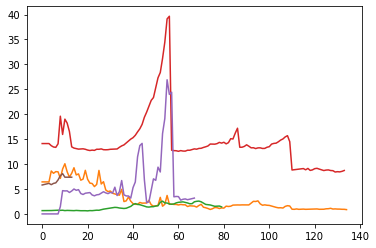

In [47]:
plt.plot(masterdata.T)

In [53]:
epiclist = [nonan.iloc[2048,0], nonan.iloc[2018,0]]

In [54]:
epiclist

[3.6331707317073154, 0.0]

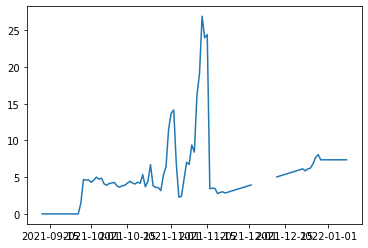

In [36]:
plt.plot(nonan)

In [6]:
plt.plot(pHdata.iloc[:, [1,10,27,30]])
# manually switch to pandas interpolate, cap the # of days
# Find the program with every chunk between 10 day break
# All of functions to external file, new repository, GitHub project
# have functions that GitHub loads are the ones on google drive
# add folder in GH that has all the names of the ones in the Drive

IndexError: positional indexers are out-of-bounds

In [56]:
pHdata.iloc[:, 30:34]

value               
siteID         TOMB TOOK WALK WLOU
startDateTime                     
2016-03-04      NaN  NaN  NaN  NaN
2016-03-05      NaN  NaN  NaN  NaN
2016-03-06      NaN  NaN  NaN  NaN
2016-03-07      NaN  NaN  NaN  NaN
2016-03-08      NaN  NaN  NaN  NaN
...             ...  ...  ...  ...
2022-01-27      NaN  NaN  NaN  NaN
2022-01-28      NaN  NaN  NaN  NaN
2022-01-29      NaN  NaN  NaN  NaN
2022-01-30      NaN  NaN  NaN  NaN
2022-01-31      NaN  NaN  NaN  NaN

[2160 rows x 4 columns]

([<matplotlib.axis.XTick at 0x7fc667d480a0>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

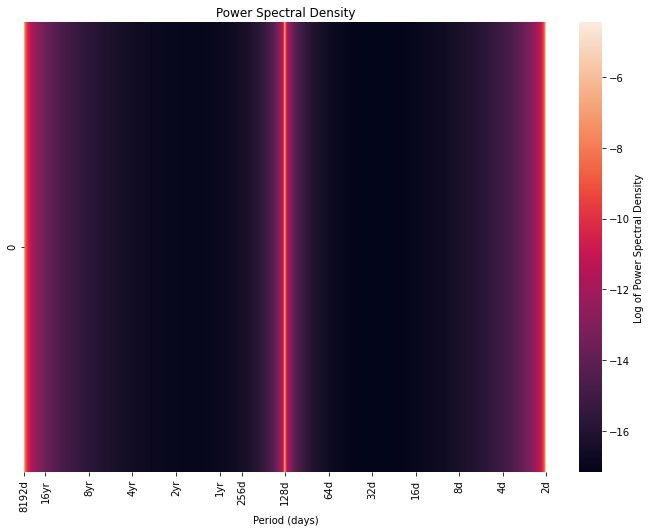

In [92]:
yvalues = np.array(range(0,2**(14-1)+1))
xtickmarks = [2, 4,8,16,32,64,128,256,365, 365*2, 365*4, 365*8, 365*16, 8192]

x = xvalues
y = yvalues
f = sci.interpolate.interp1d(x, y)
xtickmarks = xtickmarks[0:14]
xnew = xtickmarks #Starting period, ending period, interval of jump
ynew = f(xnew) # use interpolation function returned by `interp1d`
rcParams['figure.figsize'] = 11.7,8.27
s = sns.heatmap(np.log(aphmean.T), cbar_kws={'label': 'Log of Power Spectral Density'})
s.set_title('Power Spectral Density')
#s.set_xscale("log", base = 2)
s.set_xlabel('Period (days)') 
locs, labels = plt.xticks()
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d']
plt.xticks(ynew,newlabel)

              chlaRelativeFluorescence
inf                           1.000000
1.638400e+04                  1.000000
8.192000e+03                  1.000000
5.461333e+03                  1.000000
4.096000e+03                  1.000000
...                                ...
2.000977e+00                  0.011193
2.000733e+00                  0.019516
2.000488e+00                  0.042376
2.000244e+00                  0.210147
2.000000e+00                  0.487679

[8193 rows x 1 columns]


<ipython-input-79-b94e1913bfaf>:25: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['chlaRelativeFluorescence'])


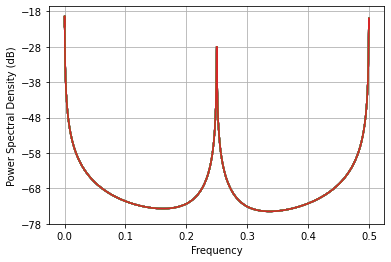

In [79]:
pHdata = pd.read_csv('/Users/athenaye/Desktop/Complete Data/chlaRelativeFluorescence.csv', index_col = 'startDateTime')
pHdata.index = pd.to_datetime(pHdata.index)
pHdata = pHdata.drop('Unnamed: 0', axis = 1)
pHdata
pHdata = pHdata[pHdata['variable'] == 'chlaRelativeFluorescence']
pHdata = pHdata.pivot(columns='siteID')[['value']]
for x in range(len(pHdata.columns)):
    nonan = pHdata.iloc[:, [1,10,27,30]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aphmean = acumulative.mean(axis=(0))
bphmean = bcumulative.mean(axis=(0))
aphmean = pd.DataFrame(aphmean, index = bphmean)
base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 2**13+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['chlaRelativeFluorescence'])
blahblah = aphmean/aphmean.max()
print(blahblah)

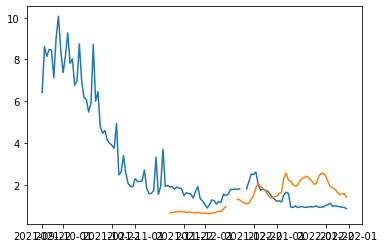

In [7]:
plt.plot(pHdata)

In [75]:
hello = pHdata.iloc[:, [1,10,27,30]]
hello.interpolate('time', limit_direction='both')

value                               
siteID             BARC      FLNT       SUGG      TOMB
startDateTime                                         
2016-03-04     6.423184  0.661200  14.115730  0.000000
2016-03-05     6.423184  0.661200  14.115730  0.000000
2016-03-06     6.423184  0.661200  14.115730  0.000000
2016-03-07     6.423184  0.661200  14.115730  0.000000
2016-03-08     6.423184  0.661200  14.115730  0.000000
...                 ...       ...        ...       ...
2022-01-27     0.969896  1.653206   8.407465  7.368182
2022-01-28     0.963542  1.526167   8.475347  7.368182
2022-01-29     0.930347  1.564564   8.434965  7.368182
2022-01-30     0.924722  1.582042   8.541806  7.368182
2022-01-31     0.862396  1.412927   8.715312  7.368182

[2160 rows x 4 columns]

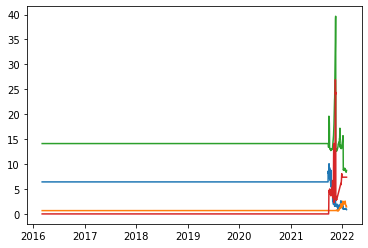

In [76]:
plt.plot(hello.interpolate('time', limit_direction='both'))

In [69]:
pHdata.iloc[:, [1,10,27,30]]

value                         
siteID             BARC      FLNT      SUGG TOMB
startDateTime                                   
2016-03-04          NaN       NaN       NaN  NaN
2016-03-05          NaN       NaN       NaN  NaN
2016-03-06          NaN       NaN       NaN  NaN
2016-03-07          NaN       NaN       NaN  NaN
2016-03-08          NaN       NaN       NaN  NaN
...                 ...       ...       ...  ...
2022-01-27     0.969896  1.653206  8.407465  NaN
2022-01-28     0.963542  1.526167  8.475347  NaN
2022-01-29     0.930347  1.564564  8.434965  NaN
2022-01-30     0.924722  1.582042  8.541806  NaN
2022-01-31     0.862396  1.412927  8.715312  NaN

[2160 rows x 4 columns]

In [85]:
pHdata.to_csv('/Users/athenaye/Desktop/ox.csv')

In [36]:
pHdata.columns

MultiIndex([('value', 'ARIK'),
            ('value', 'BARC'),
            ('value', 'BIGC'),
            ('value', 'BLDE'),
            ('value', 'BLUE'),
            ('value', 'BLWA'),
            ('value', 'CARI'),
            ('value', 'COMO'),
            ('value', 'CRAM'),
            ('value', 'CUPE'),
            ('value', 'FLNT'),
            ('value', 'GUIL'),
            ('value', 'HOPB'),
            ('value', 'KING'),
            ('value', 'LECO'),
            ('value', 'LEWI'),
            ('value', 'LIRO'),
            ('value', 'MART'),
            ('value', 'MAYF'),
            ('value', 'MCDI'),
            ('value', 'MCRA'),
            ('value', 'OKSR'),
            ('value', 'POSE'),
            ('value', 'PRIN'),
            ('value', 'PRLA'),
            ('value', 'PRPO'),
            ('value', 'REDB'),
            ('value', 'SUGG'),
            ('value', 'SYCA'),
            ('value', 'TECR'),
            ('value', 'TOMB'),
            ('value', 'TOOK'),
        

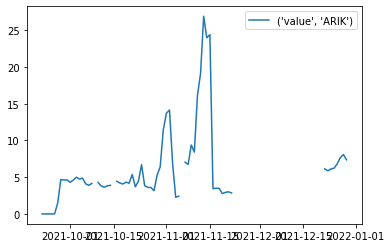

In [70]:
plt.plot(pHdata.iloc[:, 30])
plt.legend(pHdata.columns)

In [ ]:
BARC 1, FLNT 10 , SUGG 27, TOMB 30

In [43]:
pHdata.iloc[:, 0:2]

value          
siteID         ARIK      BARC
startDateTime                
2016-03-04      NaN       NaN
2016-03-05      NaN       NaN
2016-03-06      NaN       NaN
2016-03-07      NaN       NaN
2016-03-08      NaN       NaN
...             ...       ...
2022-01-27      NaN  0.969896
2022-01-28      NaN  0.963542
2022-01-29      NaN  0.930347
2022-01-30      NaN  0.924722
2022-01-31      NaN  0.862396

[2160 rows x 2 columns]

In [10]:
a

array([nan, nan, nan, ..., nan, nan, nan])

/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7035: RuntimeWarning: divide by zero encountered in log10
  line = self.plot(freqs, 10 * np.log10(pxx), **kwargs)
<ipython-input-8-9c7cba4119ad>:25: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['chlaRelativeFluorescence'])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]


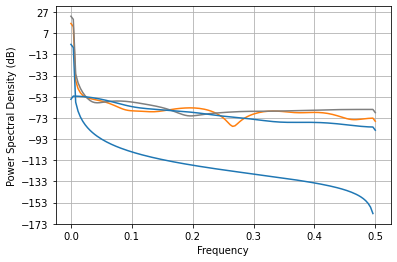

In [8]:
pHdata = pd.read_csv('/Users/athenaye/Desktop/Complete Data/chlaRelativeFluorescence.csv', index_col = 'startDateTime')
pHdata.index = pd.to_datetime(pHdata.index)
pHdata = pHdata.drop('Unnamed: 0', axis = 1)
pHdata
pHdata = pHdata[pHdata['variable'] == 'chlaRelativeFluorescence']
pHdata = pHdata.pivot(columns='siteID')[['value']]
for x in range(len(pHdata.columns)):
    nonan = pHdata[pHdata.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**8)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aphmean = acumulative.mean(axis=(0))
bphmean = bcumulative.mean(axis=(0))
aphmean = pd.DataFrame(aphmean, index = bphmean)
base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,6, num = 2**7+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['chlaRelativeFluorescence'])
aphmean = aphmean/aphmean.max()
print(a)

In [ ]:
avgoverall = pd.read_csv('./PollenandBird/avgoverall.csv', index_col = 'date')
avgoverall.index = pd.to_datetime(avgoverall.index)
avgoverallsamp = avgoverall.iloc[:,0:50]
for x in range(len(avgoverallsamp.columns)):
    nonan = avgoverallsamp[avgoverallsamp.columns[x]]
    nonan = nonan.interpolate('linear', limit_direction = 'both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear')
    if x == 0:
        ameancumulative = a
        bmeancumulative = b
    else:
        ameancumulative = np.vstack([ameancumulative, a])
        bmeancumulative = np.vstack([bmeancumulative, b])
amean = ameancumulative.mean(axis=(0))
bmean = bmeancumulative.mean(axis=(0))
amean = pd.DataFrame(amean, index = bmean)
base = sci.interpolate.interp1d(1/amean.index[1:],amean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 2**(13)+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
a14mean = pd.DataFrame(interparray, index = 1/bmean, columns = ['avgoverall'])
# a14mean = a14mean/a14mean.max()
a14mean

# pH

In [13]:
#awndoverall.to_csv('./PollenandBird/awndoverall.csv')
pHdata = pd.read_csv('/Users/athenaye/Desktop/Complete Data/PARMean.csv', index_col = 'startDateTime')
pHdata.index = pd.to_datetime(pHdata.index)
pHdata = pHdata.drop('Unnamed: 0', axis = 1)
pHdata

siteID variable       value
startDateTime                            
2016-04-29      ABBY  PARMean  838.435000
2016-04-30      ABBY  PARMean  467.531111
2016-05-01      ABBY  PARMean  582.839236
2016-05-02      ABBY  PARMean  450.816250
2016-05-03      ABBY  PARMean  420.695556
...              ...      ...         ...
2022-01-27      DEJU  PARMean    5.875833
2022-01-28      DEJU  PARMean    4.698500
2022-01-29      DEJU  PARMean    6.383375
2022-01-30      DEJU  PARMean   20.555375
2022-01-31      DEJU  PARMean   22.602667

[32699 rows x 3 columns]

In [14]:
pHdata = pHdata[pHdata['variable'] == 'PARMean']
pHdata = pHdata.pivot(columns='siteID')[['value']]

In [15]:
pHdata.to_csv('/Users/athenaye/Desktop/indepth.csv')

<ipython-input-16-6352f533ae50>:19: RuntimeWarning: divide by zero encountered in true_divide
  aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['pH'])


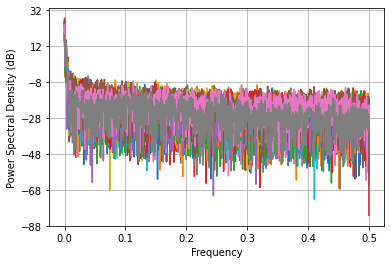

In [16]:
for x in range(len(pHdata.columns)):
    nonan = pHdata[pHdata.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aphmean = acumulative.mean(axis=(0))
bphmean = bcumulative.mean(axis=(0))
aphmean = pd.DataFrame(aphmean, index = bphmean)
base = sci.interpolate.interp1d(1/aphmean.index[1:],aphmean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 8193, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
aphmean = pd.DataFrame(interparray, index = 1/bphmean, columns = ['pH'])


Text(0.5, 1.0, 'PARMean data')

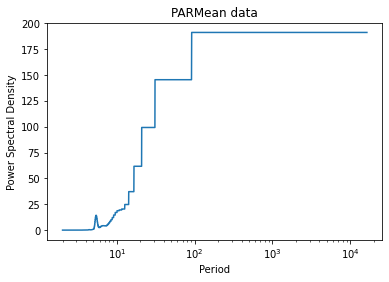

In [17]:
plt.semilogx(aphmean) #logs the x axis
plt.ylabel('Power Spectral Density')
plt.xlabel('Period')
plt.title('PARMean data')


In [163]:
aphmean

pH
inf           191.033180
1.638400e+04  191.033180
8.192000e+03  191.033180
5.461333e+03  191.033180
4.096000e+03  191.033180
...                  ...
2.000977e+00    0.005812
2.000733e+00    0.005509
2.000488e+00    0.007035
2.000244e+00    0.006510
2.000000e+00    0.002362

[8193 rows x 1 columns]

([<matplotlib.axis.XTick at 0x7fed09670a90>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

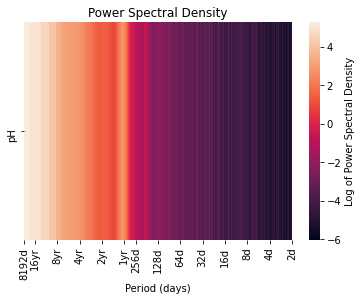

In [18]:
yvalues = np.array(range(0,8193))
xtickmarks = [2, 4,8,16,32,64,128,256,365, 365*2, 365*4, 365*8, 365*16, 8192]

x = xvalues
y = yvalues
f = sci.interpolate.interp1d(x, y)
xnew = xtickmarks #Starting period, ending period, interval of jump
ynew = f(xnew) # use interpolation function returned by `interp1d`
s = sns.heatmap(np.log(aphmean.T), cbar_kws={'label': 'Log of Power Spectral Density'})
s.set_title('Power Spectral Density')
#s.set_xscale("log", base = 2)
s.set_xlabel('Period (days)')
locs, labels = plt.xticks()
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr','4yr','8yr','16yr', '8192d']
plt.xticks(ynew,newlabel)

In [13]:
s = s.set_yscale("log")

In [14]:
s

([<matplotlib.axis.XTick at 0x7f8c84693910>,
 [Text(64.0, 0, '2d'),
  Text(51.20435545842735, 0, '4d'),
  Text(38.40650960255278, 0, '8d'),
  Text(25.60648614490491, 0, '16d'),
  Text(12.804308542581309, 0, '32d'),
  Text(0.0, 0, '64d')])

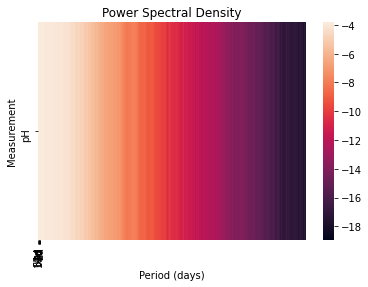

In [24]:
s = sns.heatmap(np.log(aphmean.T))
yvalues = np.array(range(0,65)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
xtickmarkloc = xtickmarkloc[0:6]
xvalues = np.linspace(1,6, num = 2**6+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values
#s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:6]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

### Detrended

In [54]:
dtpH = pd.DataFrame()
zpH = pd.DataFrame()
for x in range(len(pHdata.columns)):
    dtnonan = pHdata[pHdata.columns[x]]
    dtnonan = dtnonan.interpolate('time', limit_direction='both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zpH = pd.concat([zpH, zscore], axis = 1)
    dtpH = pd.concat([dtpH, detrend], axis = 1)

In [56]:
for x in range(len(dtpH.columns)):
    dtnonan = pHdata[pHdata.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtapH = acumulative.mean(axis=(0))
dtbpH = bcumulative.mean(axis=(0))

ValueError: array must not contain infs or NaNs

### Z-Scored

8193


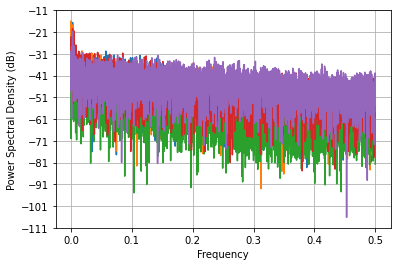

In [22]:
for x in range(len(zawnd.columns)):
    znonan = awndoverall[awndoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zaawnd = acumulative.mean(axis=(0))
zbawnd = bcumulative.mean(axis=(0))
print(a.size)

# AWND

In [4]:
#awndoverall.to_csv('./PollenandBird/awndoverall.csv')
awndoverall = pd.read_csv('./PollenandBird/awndoverall.csv', index_col = 'date')
awndoverall.index = pd.to_datetime(awndoverall.index)
awndoverall = awndoverall.drop('Unnamed: 0', axis = 1)

In [5]:
awndoverall

station AQW00061705  station FMW00040308  station GQW00041415  \
date                                                                        
1998-01-01                 25.0                 55.0                 58.0   
1998-01-02                 65.0                 47.0                 59.0   
1998-01-03                 94.0                 52.0                 60.0   
1998-01-04                 89.0                 48.0                 50.0   
1998-01-05                 43.0                 39.0                 62.0   
...                         ...                  ...                  ...   
2018-12-27                 21.0                 33.0                 51.0   
2018-12-28                 31.0                 24.0                 48.0   
2018-12-29                 28.0                 22.0                 50.0   
2018-12-30                 29.0                 34.0                 50.0   
2018-12-31                 44.0                 38.0                 60.0   

            station RQW00011641  station USC00244558  
date                                                  
1998-01-01                 38.0                 34.0  
1998-01-02                 40.0                 48.0  
1998-01-03                 49.0                 20.0  
1998-01-04                 45.0                  9.0  
1998-01-05                 28.0                 42.0  
...                         ...                  ...  
2018-12-27                 59.0                  1.0  
2018-12-28                 77.0                 17.0  
2018-12-29                 70.0                 44.0  
2018-12-30                 64.0                 43.0  
2018-12-31                 47.0                 11.0  

[7306 rows x 5 columns]

<ipython-input-12-50834b56d70b>:19: RuntimeWarning: divide by zero encountered in true_divide
  aawndmean = pd.DataFrame(interparray, index = 1/bawndmean, columns = ['AWND'])


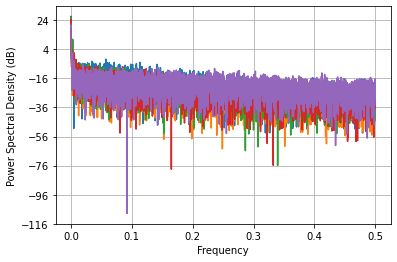

In [12]:
for x in range(len(awndoverall.columns)):
    nonan = awndoverall[awndoverall.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aawndmean = acumulative.mean(axis=(0))
bawndmean = bcumulative.mean(axis=(0))
aawndmean = pd.DataFrame(aawndmean, index = bawndmean)
base = sci.interpolate.interp1d(1/aawndmean.index[1:],aawndmean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 8193, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
aawndmean = pd.DataFrame(interparray, index = 1/bawndmean, columns = ['AWND'])

### Detrended

In [20]:
dtawnd = pd.DataFrame()
zawnd = pd.DataFrame()
for x in range(len(awndoverall.columns)):
    dtnonan = awndoverall[awndoverall.columns[x]]
    dtnonan = dtnonan.interpolate('time', limit_direction='both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zawnd = pd.concat([zawnd, zscore], axis = 1)
    dtawnd = pd.concat([dtawnd, detrend], axis = 1)

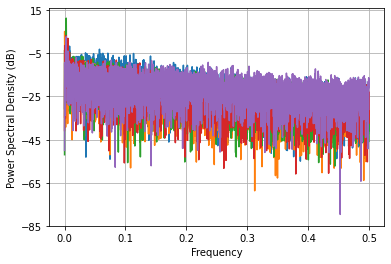

In [21]:
for x in range(len(dtawnd.columns)):
    dtnonan = awndoverall[awndoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtaawnd = acumulative.mean(axis=(0))
dtbawnd = bcumulative.mean(axis=(0))

### Z-Scored

8193


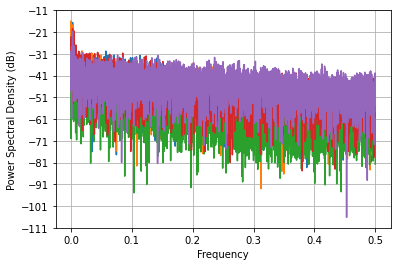

In [22]:
for x in range(len(zawnd.columns)):
    znonan = awndoverall[awndoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zaawnd = acumulative.mean(axis=(0))
zbawnd = bcumulative.mean(axis=(0))
print(a.size)

# TAVG

In [84]:
#awndoverall.to_csv('./PollenandBird/awndoverall.csv')
avgoverall = pd.read_csv('./PollenandBird/avgoverall.csv', index_col = 'date')
avgoverall.index = pd.to_datetime(avgoverall.index)

In [85]:
2**14

16384

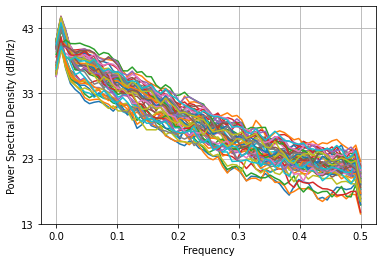

In [86]:
avgoverallsamp = avgoverall.iloc[:,0:50]
nfftnum = 7
for x in range(len(avgoverallsamp.columns)):
    nonan = avgoverallsamp[avgoverallsamp.columns[x]]
    nonan = nonan.interpolate('linear', limit_direction = 'both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')
    if x == 0:
        ameancumulative = a
        bmeancumulative = b
    else:
        ameancumulative = np.vstack([ameancumulative, a])
        bmeancumulative = np.vstack([bmeancumulative, b])
amean = ameancumulative.mean(axis=(0))
bmean = bmeancumulative.mean(axis=(0))
amean = pd.DataFrame(amean, index = bmean)
base = sci.interpolate.interp1d(1/amean.index[1:],amean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,nfftnum-1, num = 2**(nfftnum-1)+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
a7mean = pd.DataFrame(interparray, index = bmean, columns = ['TAVG'])

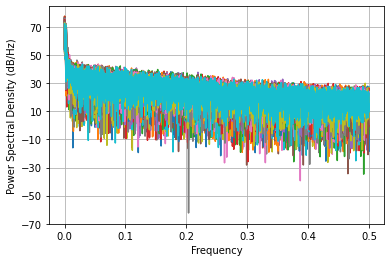

In [87]:
avgoverallsamp = avgoverall.iloc[:,0:50]
nfftnum = 14
for x in range(len(avgoverallsamp.columns)):
    nonan = avgoverallsamp[avgoverallsamp.columns[x]]
    nonan = nonan.interpolate('linear', limit_direction = 'both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')
    if x == 0:
        ameancumulative = a
        bmeancumulative = b
    else:
        ameancumulative = np.vstack([ameancumulative, a])
        bmeancumulative = np.vstack([bmeancumulative, b])
amean = ameancumulative.mean(axis=(0))
bmean = bmeancumulative.mean(axis=(0))
amean = pd.DataFrame(amean, index = bmean)
base = sci.interpolate.interp1d(1/amean.index[1:],amean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,nfftnum-1, num = 2**(nfftnum-1)+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
a14mean = pd.DataFrame(interparray, index = bmean, columns = ['TAVG'])

([<matplotlib.axis.XTick at 0x7fecdc8856a0>,
 [Text(64.0, 0, '2d'),
  Text(51.20435545842735, 0, '4d'),
  Text(38.40650960255278, 0, '8d'),
  Text(25.60648614490491, 0, '16d'),
  Text(12.804308542581309, 0, '32d'),
  Text(0.0, 0, '64d')])

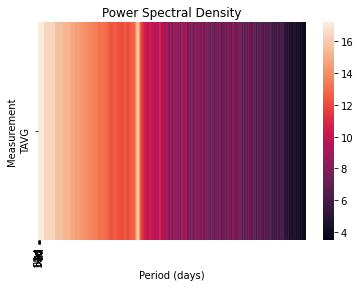

In [92]:
s = sns.heatmap(np.log(a14mean.T))
yvalues = np.array(range(0,65)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
xtickmarkloc = xtickmarkloc[0:6]
xvalues = np.linspace(1,6, num = 2**6+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values
#s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:6]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

<ipython-input-28-aacc8b67d042>:7: RuntimeWarning: divide by zero encountered in log
  s = sns.heatmap(np.log(both.T))


([<matplotlib.axis.XTick at 0x7fe256645880>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr')])

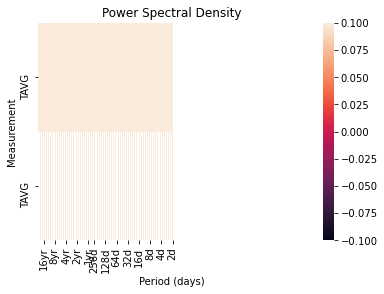

In [28]:
difference = len(a14mean)-len(a7mean)
both = pd.DataFrame()
newa7 = pd.DataFrame(a7mean)
for x in range(0, difference):
    newa7.loc[x] = 0
both = pd.concat([a14mean, newa7], axis = 1)
s = sns.heatmap(np.log(both.T))
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
xtickmarkloc = xtickmarkloc[0:13]
xvalues = np.linspace(1,13, num = 2**13+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
x = xvalues #the x-values to interpolate along??
x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values
#s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:13]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

In [29]:
acum = pd.DataFrame(ameancumulative.T, 
                    columns = avgoverallsamp.columns, 
                    index = bmeancumulative[0])
bcum = pd.DataFrame(bmeancumulative.T, columns = avgoverallsamp.columns, index = bmeancumulative[0])

In [30]:
acumnonan = acum.dropna(axis = 1)

### Detrended

In [31]:
dt = pd.DataFrame()
zmean = pd.DataFrame()
for x in range(len(acumnonan.columns)):
    dtnonan = acumnonan[acumnonan.columns[x]]
    dtnonan = dtnonan.interpolate('time', limit_direction='both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zmean = pd.concat([zmean, zscore], axis = 1)
    dt = pd.concat([dt, detrend], axis = 1)

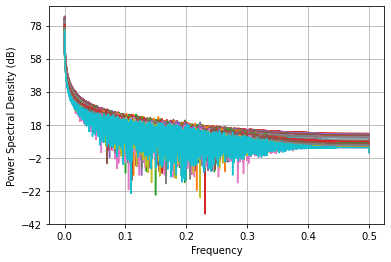

In [32]:
for x in range(len(dt.columns)):
    dtnonan = acumnonan[acumnonan.columns[x]]
    dtnonan = dtnonan.interpolate('time', limit_direction='both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtamean = acumulative.mean(axis=(0))
dtbmean = bcumulative.mean(axis=(0))

### Z-Scored

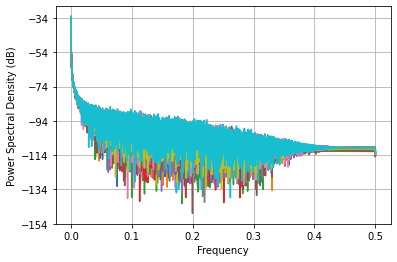

In [33]:
for x in range(len(acumnonan.columns)):
    znonan = acumnonan[acumnonan.columns[x]]
    znonan = znonan.interpolate('time', limit_direction='both')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zamean = acumulative.mean(axis=(0))
zbmean = bcumulative.mean(axis=(0))

# TMAX

In [4]:
#awndoverall.to_csv('./PollenandBird/awndoverall.csv')
maxoverall = pd.read_csv('./PollenandBird/maxoverall.csv', index_col = 'date')
maxoverall.index = pd.to_datetime(maxoverall.index)

In [5]:
maxoverall

station AE000041196  station AEM00041194  station AEM00041217  \
date                                                                        
1998-01-01                261.0                254.0                272.0   
1998-01-02                  NaN                  NaN                  NaN   
1998-01-03                  NaN                  NaN                  NaN   
1998-01-04                  NaN                  NaN                  NaN   
1998-01-05                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2018-12-27                263.0                268.0                265.0   
2018-12-28                258.0                261.0                271.0   
2018-12-29                266.0                273.0                272.0   
2018-12-30                260.0                263.0                255.0   
2018-12-31                276.0                276.0                278.0   

            station AEM00041218  station AG000060390  
date                                                  
1998-01-01                276.0                155.0  
1998-01-02                265.0                165.0  
1998-01-03                  NaN                193.0  
1998-01-04                  NaN                217.0  
1998-01-05                  NaN                178.0  
...                         ...                  ...  
2018-12-27                259.0                  NaN  
2018-12-28                251.0                  NaN  
2018-12-29                262.0                  NaN  
2018-12-30                285.0                  NaN  
2018-12-31                266.0                  NaN  

[7665 rows x 5 columns]

[0.00000000e+00 6.10351562e-05 1.22070312e-04 ... 4.99877930e-01
 4.99938965e-01 5.00000000e-01]
                     0
0.000000  21302.813049
0.000061  29474.880578
0.000122   9644.767045
0.000183   2530.994029
0.000244   1583.929262
...                ...
0.499756      0.007007
0.499817      0.005234
0.499878      0.003247
0.499939      0.003009
0.500000      0.001631

[8193 rows x 1 columns]


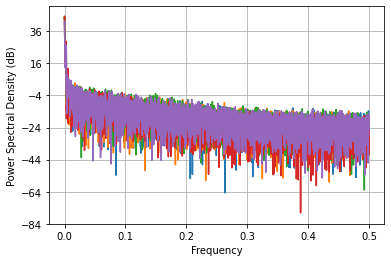

In [9]:
for x in range(len(maxoverall.columns)):
    nonan = maxoverall[maxoverall.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tmaxacumulative = a
        tmaxbcumulative = b
    else:
        tmaxacumulative = np.vstack([tmaxacumulative, a])
        tmaxbcumulative = np.vstack([tmaxbcumulative, b])
tmaxamean = np.nanmean(tmaxacumulative, axis=(0))
tmaxbmean = np.nanmean(tmaxbcumulative, axis=(0))
print(tmaxbmean)
tmaxamean = pd.DataFrame(tmaxamean, index = tmaxbmean)
print(tmaxamean)
base = sci.interpolate.interp1d(1/tmaxamean.index[1:],tmaxamean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 8193, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
tmaxamean = pd.DataFrame(interparray, index = tmaxbmean, columns = ['TMAX'])

### Detrended

In [37]:
dttmax = pd.DataFrame()
ztmax = pd.DataFrame()
for x in range(len(maxoverall.columns)):
    dtnonan = maxoverall[maxoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    ztmax = pd.concat([ztmax, zscore], axis = 1)
    dttmax = pd.concat([dttmax, detrend], axis = 1)

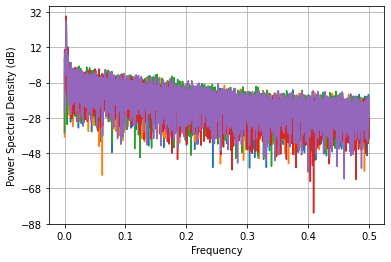

In [38]:
for x in range(len(dttmax.columns)):
    dtnonan = maxoverall[maxoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtatmax = acumulative.mean(axis=(0))
dtbtmax = bcumulative.mean(axis=(0))

### Z-Scored

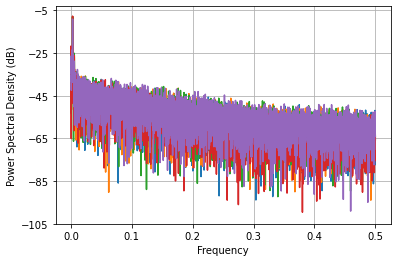

In [39]:
for x in range(len(ztmax.columns)):
    znonan = maxoverall[maxoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zatmax = acumulative.mean(axis=(0))
zbtmax = bcumulative.mean(axis=(0))

# TMIN

In [40]:
#minoverall.to_csv('./PollenandBird/minoverall.csv')
minoverall = pd.read_csv('./PollenandBird/minoverall.csv', index_col = 'date')
minoverall.index = pd.to_datetime(minoverall.index)

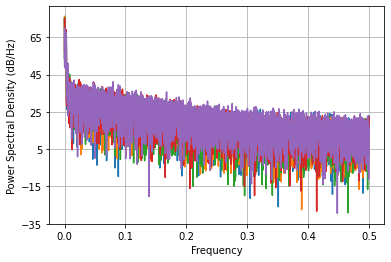

In [41]:
for x in range(len(minoverall.columns)):
    nonan = minoverall[minoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear' )
    
    if x == 0:
        tminacumulative = a
        tminbcumulative = b
    else:
        tminacumulative = np.vstack([tminacumulative, a])
        tminbcumulative = np.vstack([tminbcumulative, b])
tminamean = np.nanmean(tminacumulative, axis=(0))
tminbmean = np.nanmean(tminbcumulative, axis=(0))
tminamean = pd.DataFrame(tminamean, index = tminbmean)
base = sci.interpolate.interp1d(1/tminamean.index[1:],tminamean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 8193, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
tminamean = pd.DataFrame(interparray, index = tminbmean, columns = ['TMIN'])

### Detrended

In [42]:
dttmin = pd.DataFrame()
ztmin = pd.DataFrame()
for x in range(len(minoverall.columns)):
    dtnonan = minoverall[minoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear', limit_direction = 'both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    ztmin = pd.concat([ztmin, zscore], axis = 1)
    dttmin = pd.concat([dttmin, detrend], axis = 1)

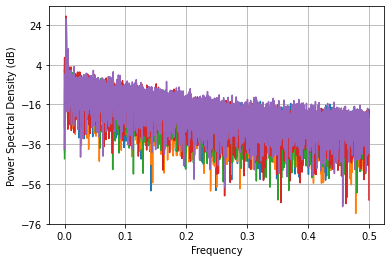

In [43]:
for x in range(len(minoverall.columns)):
    dtnonan = minoverall[minoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear', limit_direction = 'both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtamin = acumulative.mean(axis=(0))
dtbmin = bcumulative.mean(axis=(0))

### Z-Scored

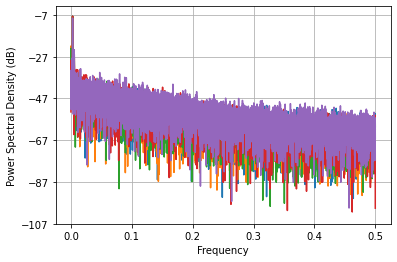

In [44]:
for x in range(len(minoverall.columns)):
    znonan = minoverall[minoverall.columns[x]]
    znonan = znonan.interpolate('linear', limit_direction = 'both')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zamin = acumulative.mean(axis=(0))
zbmin = bcumulative.mean(axis=(0))

# PRCP

In [45]:
#prcpoverall.to_csv('./PollenandBird/prcpoverall.csv')
prcpoverall = pd.read_csv('./PollenandBird/prcpoverall.csv', index_col = 'date')
prcpoverall.index = pd.to_datetime(prcpoverall.index)

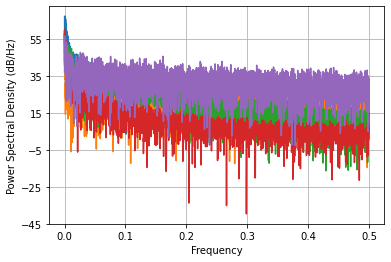

In [46]:
for x in range(len(prcpoverall.columns)):
    nonan = prcpoverall[prcpoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear')
    
    if x == 0:
        prcpacumulative = a
        prcpbcumulative = b
    else:
        prcpacumulative = np.vstack([prcpacumulative, a])
        prcpbcumulative = np.vstack([prcpbcumulative, b])
prcpamean = np.nanmean(prcpacumulative, axis=(0))
prcpbmean = np.nanmean(prcpbcumulative, axis=(0))
prcpamean = pd.DataFrame(prcpamean, index = prcpbmean)
base = sci.interpolate.interp1d(1/prcpamean.index[1:],prcpamean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,13, num = 8193, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
prcpamean = pd.DataFrame(interparray, index = prcpbmean, columns = ['PRCP'])

### Detrended

In [47]:
dtprcp = pd.DataFrame()
zprcp = pd.DataFrame()
for x in range(len(prcpoverall.columns)):
    dtnonan = prcpoverall[prcpoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zprcp = pd.concat([zprcp, zscore], axis = 1)
    dtprcp = pd.concat([dtprcp, detrend], axis = 1)

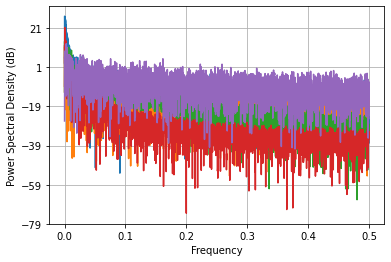

In [48]:
for x in range(len(prcpoverall.columns)):
    dtnonan = prcpoverall[prcpoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtaprcp = acumulative.mean(axis=(0))
dtbprcp = bcumulative.mean(axis=(0))

### Z-Scored

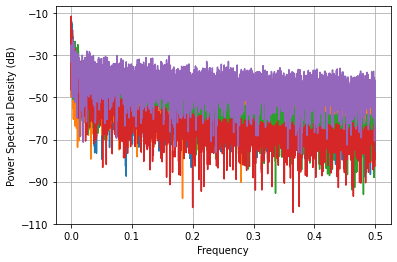

In [49]:
for x in range(len(prcpoverall.columns)):
    znonan = prcpoverall[prcpoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zaprcp = acumulative.mean(axis=(0))
zbprcp = bcumulative.mean(axis=(0))

# Bootstrapping

In [50]:
sampled = pd.DataFrame(avgoverall.iloc[:,0:5])

In [51]:
onestationyearly = sampled.set_index(sampled.index.year)
onestationyearly = onestationyearly.iloc[:,0]

In [52]:
years = sampled.index.year.drop_duplicates()
years = years.to_list()

                 0
0     15181.392398
1     21135.343814
2      7080.515680
3      1893.339903
4      1168.048256
...            ...
8188      0.003402
8189      0.006867
8190      0.007698
8191      0.004234
8192      0.000827

[8193 rows x 1 columns]


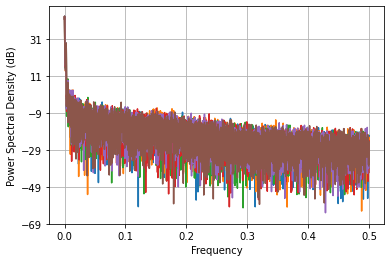

In [53]:
wholea = pd.DataFrame()
nonan = onestationyearly
nonan = nonan.interpolate('time',limit_direction='both')
a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
wholea = pd.DataFrame(a)
print(wholea)
numberofruns = 5
for x in range(numberofruns):
    boots = pd.DataFrame()
    random = np.random.choice(years, len(years))
    for q in range(len(years)):
        remade = onestationyearly.loc[[random[q]]]
        boots = pd.concat([boots, remade])
    nonan = boots[boots.columns[0]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    bacumulative = pd.DataFrame(a)
    wholea = pd.concat([wholea, bacumulative], axis = 1)
wholea.index = b
wholea.columns = np.array(range(numberofruns+1))

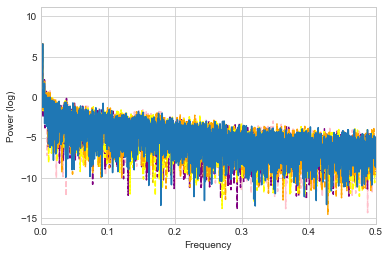

In [54]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.set(xlim=(0, 0.5),
       xlabel='Frequency', ylabel='Power (log)')
col = ['blue', 'pink','purple','yellow','orange','red'] 
for i in range(1,5):
    plt.plot(b,np.log(wholea.iloc[:,i]), '--', color = col[i])
plt.plot(b,np.log(a))

# 16-32 vs. 32+ Days Figure

In [55]:
overall = avgoverall.interpolate('time', limit_direction='both')
overall = pd.DataFrame(overall)
overall = overall.set_index(sampled.index.year)
overall.columns = overall.columns.str.replace("[station ]","")
overall

AE000041196  AEM00041194  AEM00041217  AEM00041218  AG000060390  \
date                                                                    
1998        195.0        210.0        204.0        212.0        105.0   
1998        218.0        232.0        234.0        219.0        114.0   
1998        188.0        194.0        204.0        195.0        148.0   
1998        205.0        226.0        224.0        218.0        136.0   
1998        216.0        218.0        232.0        223.0        132.0   
...           ...          ...          ...          ...          ...   
2018        187.0        217.0        203.0        197.0        103.0   
2018        187.0        216.0        202.0        196.0        133.0   
2018        195.0        219.0        209.0        204.0        111.0   
2018        202.0        222.0        207.0        216.0         96.0   
2018        206.0        227.0        214.0        213.0        112.0   

      AG000060590  AG000060611  AGE00147718  AGM00060351  AGM00060355  ...  \
date                                                                   ...   
1998         89.0        128.0        103.0        125.0        123.0  ...   
1998         97.0        107.0        128.0        132.0        135.0  ...   
1998        101.0         77.0        156.0        161.0        158.0  ...   
1998        142.0        109.0        163.0        147.0        152.0  ...   
1998        114.0         94.0        126.0        134.0        143.0  ...   
...           ...          ...          ...          ...          ...  ...   
2018        104.0        118.0        102.0        119.0        136.0  ...   
2018         82.0         99.0         92.0        124.0        129.0  ...   
2018        102.0         90.0         99.0        131.0        135.0  ...   
2018        106.0        106.0         98.0        120.0        140.0  ...   
2018         88.0         95.0        116.0        130.0        145.0  ...   

      USR0000WGOH  KG000036982  USR0000CSCN  BLM00085153  JA000047940  \
date                                                                    
1998         82.0       -201.0         39.0        185.0        273.0   
1998         82.0       -187.0         21.0        185.0        273.0   
1998         82.0       -204.0         17.0        185.0        273.0   
1998         82.0       -213.0         -1.0        185.0        273.0   
1998         82.0       -223.0        -21.0        185.0        273.0   
...           ...          ...          ...          ...          ...   
2018        -24.0       -188.0         33.0        291.0        186.0   
2018        -12.0       -217.0         34.0        294.0        147.0   
2018         22.0       -196.0         22.0        300.0        148.0   
2018        -16.0       -157.0         43.0        300.0        155.0   
2018        -38.0       -192.0         17.0        293.0        177.0   

      USR0000IBEA  RSM00028593  TZ000063832  USR0000CSCI  GHM00065459  
date                                                                   
1998         -3.0       -341.0        216.0        110.0        293.0  
1998        -20.0       -203.0        216.0        107.0        293.0  
1998        -20.0       -186.0        216.0         83.0        293.0  
1998        -48.0       -223.0        216.0         82.0        293.0  
1998        -76.0       -164.0        216.0         69.0        293.0  
...           ...          ...          ...          ...          ...  
2018        -93.0       -269.0        242.0        137.0        300.8  
2018       -100.0       -168.0        245.0         94.0        301.2  
2018        -71.0       -127.0        246.0         82.0        301.6  
2018        -74.0       -118.0        248.0        103.0        302.0  
2018       -132.0       -182.0        239.0        118.0        307.0  

[7665 rows x 3527 columns]

In [56]:
detrendedsamp = avgoverall.iloc[:,0::50].interpolate('time', limit_direction='both')
detrendedsamp = pd.DataFrame(detrendedsamp)
detrendedsamp = detrendedsamp.set_index(sampled.index.year)
detrendedsamp.columns = detrendedsamp.columns.str.replace("[station ]","")
detrendedsamp

AE000041196  AR000087692  ASN00010286  ASN00091311  BLM00085244  \
date                                                                    
1998        195.0        149.0        307.0        199.0        257.0   
1998        218.0        163.0        307.0        173.0        261.0   
1998        188.0        204.0        307.0        157.0        257.0   
1998        205.0        217.0        307.0        164.0        277.0   
1998        216.0        217.0        307.0        163.0        277.0   
...           ...          ...          ...          ...          ...   
2018        187.0        224.0        233.0        208.0        267.0   
2018        187.0        186.0        221.0        224.0        269.0   
2018        195.0        219.0        239.0        171.0        262.0   
2018        202.0        208.0        267.0        173.0        257.0   
2018        206.0        187.0        285.0        182.0        246.0   

      BRM00082098  CA007054096  CHM00052436  CHM00054346  CHM00056954  ...  \
date                                                                   ...   
1998        279.0      -203.00        -60.0        -81.0        141.0  ...   
1998        277.0      -112.00        -88.0        -61.0        146.0  ...   
1998        278.0      -106.25       -143.0       -101.0        139.0  ...   
1998        286.0      -100.50       -135.0       -131.0        125.0  ...   
1998        286.0       -94.75       -129.0        -83.0        125.0  ...   
...           ...          ...          ...          ...          ...  ...   
2018        275.0      -138.00       -198.0       -178.0        137.0  ...   
2018        259.0       -72.00       -198.0       -132.0        150.0  ...   
2018        259.0       -97.00       -179.0       -142.0        156.0  ...   
2018        270.0      -135.00       -137.0       -147.0        168.0  ...   
2018        279.0       -67.00       -139.0       -142.0        143.0  ...   

      USS0020B02S  USS0021C40S  USS0046Q01S  VMM00048806  KZ000035426  \
date                                                                    
1998          0.0        146.0       -280.0        187.0        -84.0   
1998        -68.0        146.0       -300.0        198.0        -84.0   
1998        -84.0        146.0       -240.0        203.0       -112.0   
1998        -55.0        146.0       -220.0        188.0       -163.0   
1998        -35.0        146.0       -240.0        188.0       -161.0   
...           ...          ...          ...          ...          ...   
2018        -31.0          6.0       -101.0        181.0        -63.0   
2018        -25.0         20.0       -112.0        170.0        -44.0   
2018         29.0         49.0       -163.0        124.0        -88.0   
2018        -16.0          5.0       -115.0         86.0       -118.0   
2018        -46.0        -13.0        -26.0         91.0       -104.0   

      PKM00041685  USR0000VCRA  UY000001709  RSM00028696  USR0000ISKU  
date                                                                   
1998        283.0        144.0        216.0       -329.0         12.0  
1998        283.0        144.0        216.0       -244.0          6.0  
1998        283.0        144.0        216.0       -218.0         -1.0  
1998        283.0        144.0        216.0       -287.0         -6.0  
1998        283.0        144.0        216.0       -216.0        -39.0  
...           ...          ...          ...          ...          ...  
2018        108.0          9.0        285.0        173.0        -77.0  
2018        111.0         88.0        312.0        173.0        -81.0  
2018        111.0         76.0        292.0        173.0        -66.0  
2018         98.0         72.0        272.0        173.0        -48.0  
2018        115.0         84.0        254.0        173.0       -119.0  

[7665 rows x 71 columns]

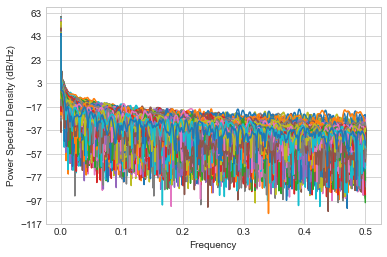

In [57]:
yearly1632 = pd.DataFrame()
yearly32plus = pd.DataFrame()
allratios = pd.DataFrame()
power = pd.DataFrame()
#rawdata = pd.DataFrame()
data = detrendedsamp
umappeddata = pd.DataFrame()
for s in range(len(data.columns)):
    ratios = pd.DataFrame()
    #rawdata = pd.DataFrame()
    sixteenthirtytwo = pd.DataFrame()
    thirtytwoplus = pd.DataFrame()
    for y in range(1998,2019):
        nonan = data.iloc[:,s].loc[y]
        nonan = nonan.interpolate('time', limit_direction='both')
        a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear')
        a = stat.zscore(a)
        a = pd.DataFrame(a, index = b)
        base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
        xvalues = np.linspace(1,13, num = 8193, endpoint = True)
        xvalues = xvalues[::-1]
        xvalues = 2**xvalues
        interparray = base(xvalues)
        plot1632 = pd.DataFrame(interparray, index = b, columns = [np.random.rand()*10])
        umapped = pd.DataFrame(interparray, index = b, columns = [str(data.columns[s]) + ': ' + str(y)])
        lower = plot1632.loc[0.03125:0.0625].mean()
        higher = plot1632.loc[0.015625:0.03125].mean()
        fraction = higher/lower
        ratios = pd.concat([ratios, fraction])
        sixteenthirtytwo = pd.concat([sixteenthirtytwo, lower])
        thirtytwoplus = pd.concat([thirtytwoplus, higher])
        power = pd.concat([power, plot1632], axis = 1)
        umappeddata = pd.concat([umappeddata, umapped], axis = 1)
    allratios = pd.concat([allratios, ratios], axis = 1)
    yearly1632 = pd.concat([yearly1632, sixteenthirtytwo], axis =1)
    yearly32plus = pd.concat([yearly32plus, thirtytwoplus], axis =1)
allratios.columns = avgoverall.columns[0::50]

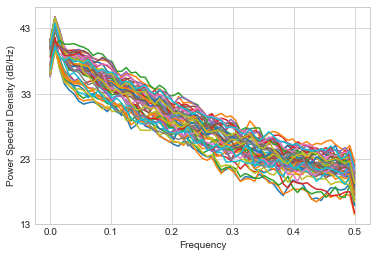

In [58]:
avgoverallsamp = avgoverall.iloc[:,0:50]
stationsonly7 = pd.DataFrame()
nfftnum = 7
for x in range(len(avgoverallsamp.columns)):
    nonan = avgoverallsamp[avgoverallsamp.columns[x]]
    nonan = nonan.interpolate('linear', limit_direction = 'both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')
    a = stat.zscore(a)
    a = pd.DataFrame(a, index = b)
    base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
    xvalues = np.linspace(1,(nfftnum-1), num = 2**(nfftnum-1)+1, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    s7 = pd.DataFrame(interparray, index = b)
    stationsonly7 = pd.concat([stationsonly7, s7], axis = 1)

Text(0, 0.5, 'Ratio of Power of 32-64 Days/16-32 Days')

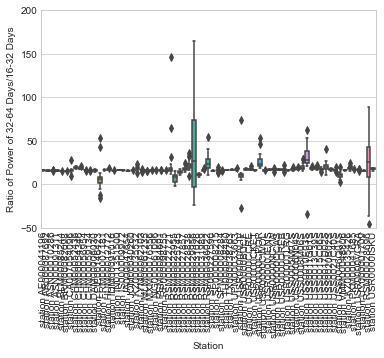

In [59]:
sns.boxplot(data = allratios)
plt.xlabel("Station")
plt.ylim(-50,200)
plt.xticks(rotation = 90)
plt.ylabel("Ratio of Power of 32-64 Days/16-32 Days")

Text(0, 0.5, 'Power of 32-64 Days')

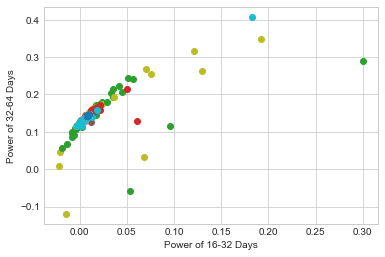

In [60]:
for i in range(len(yearly1632.columns)):
    plt.scatter(yearly1632.iloc[:,i], yearly32plus.iloc[:,i]) 
#plt.xlim(0.008,0.011)
#plt.ylim(0.1445,0.150)
plt.xlabel('Power of 16-32 Days')
plt.ylabel('Power of 32-64 Days')

# Stations

In [61]:
import umap
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

# Dimension reduction and clustering libraries
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
sns.set(style = 'white', context = 'notebook', rc = {'figure.figsize':(14,10)})

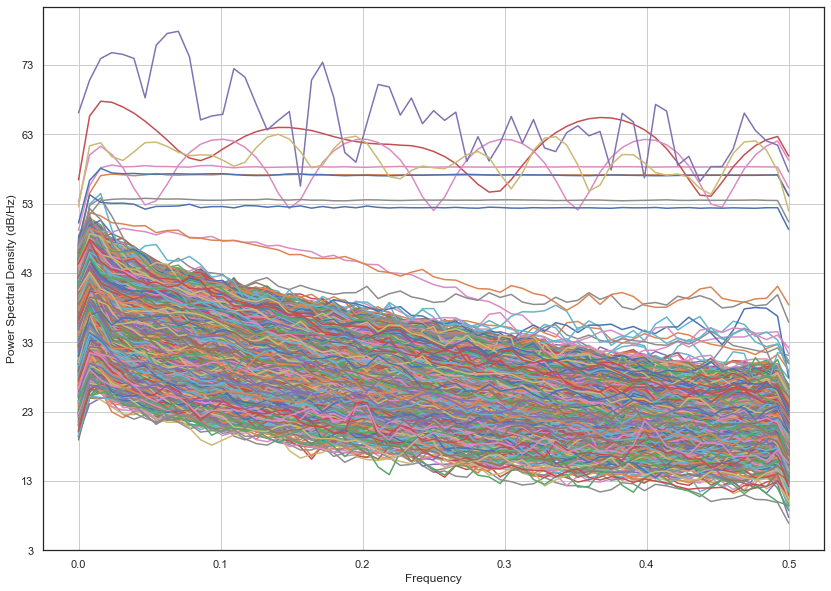

In [62]:
nfftstationsumapped = pd.DataFrame()
nfftstationsumappeddata = pd.DataFrame()
#data = detrendedsamp
data = overall
for s in range(len(data.columns)):
    nonan = data.iloc[:,s]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear')
    #a = stat.zscore(a)
    a = pd.DataFrame(a, index = b)
    base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
    xvalues = np.linspace(1,7, num = 65, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    nfftstationsumapped = pd.DataFrame(interparray, index = b, columns = [str(data.columns[s])])
    nfftstationsumappeddata = pd.concat([nfftstationsumappeddata, nfftstationsumapped], axis = 1)

In [63]:
stations = pd.read_csv('./PollenandBird/stations.csv', index_col="Station ID")
grid = pd.read_csv('./PollenandBird/grid.csv', index_col=["lat","long"])

In [67]:
overall.columns

Index(['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218',
       'AG000060390', 'AG000060590', 'AG000060611', 'AGE00147718',
       'AGM00060351', 'AGM00060355',
       ...
       'USR0000WGOH', 'KG000036982', 'USR0000CSCN', 'BLM00085153',
       'JA000047940', 'USR0000IBEA', 'RSM00028593', 'TZ000063832',
       'USR0000CSCI', 'GHM00065459'],
      dtype='object', length=3527)

In [66]:
stations.loc[overall.columns]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['ARM00087022', 'ARM00087046', 'ARM00087121', 'ARM00087166',\n       'ARM00087178',\n       ...\n       'MZM00067341', 'ARM00087641', 'BGM00041936', 'ARM00087320',\n       'MZM00067315'],\n      dtype='object', length=43). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [64]:
stationslatlongclassname = stations.loc[overall.columns]
stationslatlongclassname['Class'] = classofstation

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['ARM00087022', 'ARM00087046', 'ARM00087121', 'ARM00087166',\n       'ARM00087178',\n       ...\n       'MZM00067341', 'ARM00087641', 'BGM00041936', 'ARM00087320',\n       'MZM00067315'],\n      dtype='object', length=43). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
stationslatlongclassname.to_csv('/Users/athenaye/Desktop/stationslatlongclassname.csv')

In [ ]:
colorofstation = list()
for x in range(len(overall.columns)):
    if overall.columns[x] in stations.index: 
        latoutput = ((round((stations.loc[overall.columns[x]]['latitude'] - 0.25) * 2)) / 2) + 0.25
        longoutput = ((round((stations.loc[overall.columns[x]]['longitude'] - 0.25) * 2)) / 2) + 0.25
        try:
            colorofstation.append(grid.loc[latoutput, longoutput]['colors'])
        except:
            cooList = grid.index
            coordinate = (latoutput, longoutput)
            nearest = min(cooList, key=lambda x: math.dist(x, coordinate))
            colorofstation.append(grid.loc[nearest]['colors'])

In [ ]:
classofstation = list()
for x in range(len(overall.columns)):
    if overall.columns[x] in stations.index: 
        latoutput = ((round((stations.loc[overall.columns[x]]['latitude'] - 0.25) * 2)) / 2) + 0.25
        longoutput = ((round((stations.loc[overall.columns[x]]['longitude'] - 0.25) * 2)) / 2) + 0.25
        try:
            classofstation.append(grid.loc[latoutput, longoutput]['class'].lstrip())
        except:
            cooList = grid.index
            coordinate = (latoutput, longoutput)
            nearest = min(cooList, key=lambda x: math.dist(x, coordinate))
            classofstation.append(grid.loc[nearest]['class'].lstrip())

In [ ]:
classofstation

In [ ]:
def non_match_elements(a, b):
    non_match = []
    for i in a:
        if i not in b:
            non_match.append(i)
    return non_match

In [ ]:
eqdist = pd.DataFrame()
eqdistind = pd.DataFrame()
for l in range(len(overall.T)):
    stationlookup = str(overall.T.index[l])
    if stationlookup in stations.index: 
        distfromeq = 0 + stations.loc[stationlookup][0]
        eqdistind = np.append(eqdistind, stationlookup)
        eqdist = np.append(eqdist, distfromeq)
        eqdist = pd.DataFrame(eqdist)
eqdist.index = eqdistind

In [ ]:
a = nfftstationsumappeddata.T.index
b = eqdist.index

non_match = non_match_elements(a, b)

In [ ]:
overall = overall.drop(non_match, 1)

In [ ]:
overallwclass = overall.T
overallwclass['class'] = classofstation
overallwclass = overallwclass

In [ ]:
listofclasses = pd.DataFrame(overallwclass['class'].drop_duplicates())
listofclasses = listofclasses.applymap(lambda x: x.strip() if isinstance(x, str) else x)
listofclasses = list(listofclasses['class'])

In [ ]:
justAf = overallwclass.loc[overallwclass['class'] == "Af"] 
justAf = justAf.iloc[:,0:7665]

In [ ]:
justAf

In [ ]:
justAf.columns = range(0,7665)

In [ ]:
justAftrial = pd.melt(frame = justAf,
             var_name = 'column',
             value_name = 'value')

In [ ]:
justAftrial

In [ ]:
justAftrial

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(ax = ax,
             data = justAftrial,
             x = 'column',
             y = 'value')

plt.show()

In [ ]:
def bootstrapclasses(whichclass):
    oneclassavg7 = pd.DataFrame()
    classcolumn = []
    for x in range(len(whichclass)):
        oneclass = overallwclass.loc[overallwclass['class'] == whichclass[x]] 
        oneclassavg = pd.DataFrame(oneclass)
        oneclassavg.columns = range(0,7666)
        oneclassavg.index = oneclassavg.index.str.replace("[station ]","")
        nfftnum = 7
        print(len(oneclassavg))
        for y in range(len(oneclassavg)):
            nonan = oneclassavg.iloc[y,0:7665]
            nonan = nonan.interpolate('linear', limit_direction = 'both')
            nonan = nonan.astype(float)
            a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')
            #a = stat.zscore(a)
            a = pd.DataFrame(a, index = b)
            oneclassavg7 = pd.concat([oneclassavg7, a], axis = 0)
            for t in range(65):
                classcolumn.append(whichclass[x])
            #print(len(classcolumn))
    oneclassavg7['classlist'] = classcolumn
    #print(oneclassavg7)
    fig, ax = plt.subplots()
    s = sns.lineplot(x = oneclassavg7.index,
                 y = np.log(oneclassavg7[0]),
                hue = oneclassavg7['classlist'])
    
#     hi = np.array(oneclassavg7.index[1:])
#     nfftexpnew = 7
#     interpolated = pd.DataFrame()
#     base = sci.interpolate.interp1d(1/hi,oneclassavg7.iloc[1:,x], kind = 'nearest')
#     xvalues = np.linspace(1,nfftexpnew-1, num = 8193, endpoint = True)
#     xvalues = xvalues[::-1]
#     xvalues = 2**xvalues
#     interparray = base(xvalues)
#     series = pd.Series(interparray, index = xvalues)
#     interpolated = pd.concat([interpolated, series], axis = 1)
#     interpolated.rename_axis('frequency')
#     interpolated.rename_axis('measurement', axis='columns')
#     yvalues = np.array(range(0,8193)) #y-values
#     xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
#     xtickmarkloc = xtickmarkloc[0:nfftexpnew-1]
#     x = xvalues #the x-values to interpolate along??
#     y = yvalues #the y-values to interpolate along??
#     f = sci.interpolate.interp1d(x, y) #interpolating 
#     xnew = xtickmarkloc #the desired x-values
#     ynew = f(xnew) #list of values
#     s = sns.lineplot(x = interpolated.index.T,
#                  y = np.log(interpolated.iloc[:,0].T))
#                 #hue = oneclassavg7['classlist']) #creating the heatmap and labeling the color bar
#     s.set_title('Power Spectral Density') #setting the heatmap title
#     s.set_xlabel('Period (days)') #setting the heatmap x-axis label
#     s.set_ylabel('Measurement') #setting the heatmap x-axis label
#     newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
#     newlabel = newlabel[0:nfftexpnew-1]
#     plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabel
    
# #make interpolated into 

In [ ]:
bootstrapclasses("Bwh")

In [ ]:
interpolated

In [ ]:
interpolated.iloc[:,1]

In [ ]:
#interpolated = interpolated.reset_index()
s = sns.lineplot(data = interpolated, x = 'index',
                 y = interpolated.iloc[:,1])
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:nfftexpnew-1]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabel

In [ ]:
interpolated[0]

In [ ]:
bootstrapclasses(["BWh"])

In [ ]:
np.log(interpolated.iloc[:,0]).shape

In [ ]:
avg7overall = pd.DataFrame()
for x in range(len(listofclasses)):
    oneclass = overallwclass.loc[overallwclass['class'] == listofclasses[x]] 
    oneclassavg = pd.DataFrame(oneclass)
    oneclassavg.columns = range(0,7666)
    oneclassavg.index = oneclassavg.index.str.replace("[station ]","")
    oneclassavg7 = pd.DataFrame()
    nfftnum = 13
    for y in range(len(oneclassavg)):
        nonan = oneclassavg.iloc[y,0:7665]
        nonan = nonan.interpolate('linear', limit_direction = 'both')
        nonan = nonan.astype(float)
        a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')
        #a = stat.zscore(a)
        a = pd.DataFrame(a, index = b)
        oneclassavg7 = pd.concat([oneclassavg7, a], axis = 1)
    avg7 = oneclassavg7.mean(axis = 1)
    avg7overall = pd.concat([avg7overall, avg7], axis = 1)
avg7overall.columns = listofclasses
avg7overall

In [ ]:
overallwclass

In [ ]:
def randomclass(classification):
    oneclass = overallwclass.loc[overallwclass['class'] == classification] 
    oneclassavg = pd.DataFrame(oneclass)
    print(len(oneclassavg))
    n = np.random.randint(0, len(oneclassavg))
    print(n)
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(oneclassavg.iloc[n])
    ax2.psd(oneclassavg[n], Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')

In [ ]:
avg7overall.iloc[3000:3100].abs().max()[1]

In [ ]:
avg7overall.iloc[3000:3100].abs().max()

In [ ]:
hi = np.array(normavg7overall.index[1:])
nfftexpnew = 14
interpolated = pd.DataFrame()
for x in range(len(normavg7overall.columns)):
    base = sci.interpolate.interp1d(1/hi,normavg7overall.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,nfftexpnew-1, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
xtickmarkloc = xtickmarkloc[0:nfftexpnew-1]
x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values
interpolated.columns = normavg7overall.columns
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:nfftexpnew-1]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

In [ ]:
normavg7overall = pd.DataFrame()
for x in range(len(avg7overall.columns)):
    normavg7overall[x] = avg7overall.iloc[:,x]/avg7overall.iloc[:,x].abs().max()
normavg7overall.columns = avg7overall.columns

In [ ]:
avg7overall

In [ ]:
avg7overall.iloc[15:30]

In [ ]:
avg7overall.max()

In [ ]:
avg7overall.iloc[15:30].abs().max()

In [ ]:
yearnormavg7overall = pd.DataFrame()
for x in range(len(avg7overall.columns)):
    yearnormavg7overall[x] = avg7overall.iloc[:,x]/avg7overall.iloc[15:30].abs().max()[x]
yearnormavg7overall.columns = avg7overall.columns

In [ ]:
yearnormavg7overall

In [ ]:
hi = np.array(yearnormavg7overall.index[1:])
nfftexpnew = 14
interpolated = pd.DataFrame()
for x in range(len(yearnormavg7overall.columns)):
    base = sci.interpolate.interp1d(1/hi,yearnormavg7overall.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,nfftexpnew-1, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
xtickmarkloc = xtickmarkloc[0:nfftexpnew-1]
x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values
interpolated.columns = normavg7overall.columns
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:nfftexpnew-1]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels
plt.savefig('/Users/athenaye/Desktop/YearNormalizedKCC.pdf')

In [ ]:
hi = np.array(avg7overall.index[1:])
nfftexpnew = 14
interpolated = pd.DataFrame()
for x in range(len(avg7overall.columns)):
    base = sci.interpolate.interp1d(1/hi,avg7overall.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,nfftexpnew-1, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
xtickmarkloc = xtickmarkloc[0:nfftexpnew-1]
x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values
interpolated.columns = avg7overall.columns
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
newlabel = newlabel[0:nfftexpnew-1]
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels
plt.savefig('/Users/athenaye/Desktop/NotNormalizedKCC.pdf')

In [ ]:
eq = eqdist.sort_values(0)

In [ ]:
eq

In [ ]:
colors = []
absdist = eqdist.abs()
for x in range(len(eqdist)):
    if int(absdist.iloc[x]) <= 23.5:
        colors.append('r')
    if int(absdist.iloc[x]) > 23.5 and int(absdist.iloc[x])  <= 40:
        colors.append('y')
    if int(absdist.iloc[x]) > 40 and int(absdist.iloc[x]) <= 60:
        colors.append('b')
    if int(absdist.iloc[x]) > 60 and int(absdist.iloc[x]) <= 90:
        colors.append('g')

In [ ]:
um = umap.UMAP()
Y_umap = um.fit_transform(nfftstationsumappeddata.T)

In [ ]:
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,3527)))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (nfftstationsumappeddata.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
um = umap.UMAP()
Y_umap1 = um.fit_transform(nfftstationsumappeddata.T.drop(non_match,0))

In [ ]:
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap1[:, 0], Y_umap1[:, 1], c = abs(eqdist[0]))
plt.colorbar(sc, label='Latitude')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (nfftstationsumappeddata.T.drop(non_match,0).index)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap1[:, 0], Y_umap1[:, 1], color = colorofstation)
#plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (overall.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
stations = pd.read_csv("./NOAAData/ghcnd-stations.csv", header = None, index_col = 0, names = ['Station ID', 'latitude', 'longitude', 'elevation', 'Station name'])

In [ ]:
def findstation(stationcode):
    overallcol = ['blue','red','purple']
    fig, (ax1, ax2) = plt.subplots(2)
    for l in range(len(stationcode)):
        for x in range(len(stationcode[l])):
            stationname = 'station '+str(stationcode[l][x])
            column = avgoverall.columns.get_loc(stationname)
            nonan = avgoverall.iloc[:,column]
            nonan = nonan.interpolate('time', limit_direction='both')
            z,y = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear')
            z = pd.DataFrame(z,  index = y)
            ax2.plot(z, overallcol[l])
            ax1.plot(nonan, overallcol[l])

In [ ]:
findstation((['RP000098755', 'TH000048450', 'ASN00091311'], ['USR0000BUCF', 'USS0017D02S'], ['RSM00029956', 'RSM00031026']))

In [ ]:
stationname = 'station JA000047654'
#fig, (ax1, ax2) = plt.subplots(2)
column = avgoverall.columns.get_loc(stationname)
nonan = avgoverall.iloc[:,column]
nonan = nonan.interpolate('time', limit_direction='both')

c,d = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear')
a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear',linewidth=4.0)

In [ ]:
import csv

txt_file = r"/Users/athenaye/Downloads/ghcnd-stations.txt"
csv_file = r"./NOAAData/ghcnd-stations.csv"

with open(txt_file, "r") as in_text:
    in_reader = csv.reader(in_text, delimiter = '\t')
    with open(csv_file, "w") as out_csv:
        out_writer = csv.writer(out_csv, delimiter =',') #, newline='')
        for row in in_reader:
            out_writer.writerow(row)

In [ ]:
dataframe = pd.read_csv("/Users/athenaye/Downloads/ghcnd-stations.txt",delimiter="\t", header = None)

# UMAP for station:year

In [ ]:
def findstationyear(year, stationcode):
    overallcol = ['blue','red','purple']
    fig, (ax1, ax2) = plt.subplots(2)
    for l in range(len(stationcode)):
        for x in range(len(stationcode[l])):
            startdate = str(year[l][x])+"-01-01"
            enddate = str(year[l][x])+"-12-31"
            stationname = 'station '+str(stationcode[l][x])
            column = avgoverall.columns.get_loc(stationname)
            starting = avgoverall.index.get_loc(startdate)
            ending = avgoverall.index.get_loc(enddate)
            nonan = avgoverall.iloc[starting:ending,column]
            nonan = nonan.interpolate('time', limit_direction='both')
            z,y = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**7, detrend = 'linear')
            z = pd.DataFrame(z,  index = y)
            ax2.plot(z, overallcol[l])
            ax1.plot(nonan, overallcol[l])

In [ ]:
power = pd.DataFrame()
data = detrendedsamp
for s in range(len(data.columns)):
    for y in range(1998,2019):
        nonan = data.iloc[:,s].loc[y]
        nonan = nonan.interpolate('time', limit_direction='both')
        a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear')
        a = stat.zscore(a)
        a = pd.DataFrame(a, index = b)
        base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
        xvalues = np.linspace(1,13, num = 8193, endpoint = True)
        xvalues = xvalues[::-1]
        xvalues = 2**xvalues
        interparray = base(xvalues)
        interparraymean = pd.DataFrame(interparray)
        plot1632 = pd.DataFrame(interparray, index = b, columns = [interparraymean.iloc[4097:8194].mean()])
        power = pd.concat([power, plot1632], axis = 1)

In [ ]:
um = umap.UMAP()
Y_umap = um.fit_transform(power.T)

In [ ]:
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1], c = np.array(range(0,1491)))
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (nfftstationsumappeddata.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
fig = plt.figure(figsize=(6,6))
sc = plt.scatter(Y_umap[:, 0], Y_umap[:, 1])
plt.colorbar(sc, label='Stations')
plt.axis('equal')
plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')

labels = ['{0}'.format(str(i)) for i in (umappeddata.columns)]
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
findstationyear(([2009,2013, 2005], [2012, 2018, 1998], [2012,2010, 2015]), (['USR0000ISKU', 'KZ000035426','USS0006N04S'], ['TH000048450','IDM00097016', 'IDM00097016'], ['USS0046Q01S', 'RSM00023955', 'USR0000ALIV']))

# 95% Confidence Interval

# Lomb-Scargle

In [ ]:
simpleavgoverall = avgoverall.iloc[:,0::50].interpolate('time', limit_direction='both')

In [ ]:
lsfreq = np.linspace(0,0.5, 81930)
# lsfreq = 2**lsfreq
# lsfreq = 1/lsfreq
lombscargle = pd.DataFrame()
for s in range(len(simpleavgoverall.columns)):
    lc = sig.lombscargle(simpleavgoverall.index, simpleavgoverall.iloc[:,s], lsfreq[1:])
    lc = pd.DataFrame(lc)
    lombscargle = pd.concat([lombscargle, lc], axis = 1)
lombscargle.index = lsfreq[1:]
lombscargle.columns = simpleavgoverall.columns
lombscargle

In [ ]:
stationsumapped = pd.DataFrame()
stationsumappeddata = pd.DataFrame()
data = detrendedsamp
for s in range(len(data.columns)):
    nonan = data.iloc[:,s]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**14, detrend = 'linear')
    a = pd.DataFrame(a, index = b)
    base = sci.interpolate.interp1d(1/a.index[1:],a.iloc[1:,0], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    stationsumapped = pd.DataFrame(interparray, index = b, columns = [str(data.columns[s])])
    stationsumappeddata = pd.concat([stationsumappeddata, stationsumapped], axis = 1)

In [ ]:
y = stationsumappeddata.iloc[0:4].mean()
x = stationsumappeddata.iloc[5:8].mean()
w = stationsumappeddata.iloc[9:16].mean()
a = stationsumappeddata.iloc[17:36].mean()
b = stationsumappeddata.iloc[37:64].mean()
c = stationsumappeddata.iloc[65:128].mean()
d= stationsumappeddata.iloc[129:256].mean()
e = stationsumappeddata.iloc[257:512].mean()
f=stationsumappeddata.iloc[513:1024].mean()
g=stationsumappeddata.iloc[1024:2048].mean()
h=stationsumappeddata.iloc[2049:4096].mean()
i=stationsumappeddata.iloc[4097:8194].mean()
grouped = pd.DataFrame([y,x,w,a,b,c,d,e,f,g,h,i])
groupedindex = ['2-4 days','4-8 days','8-16 days','16-32 days','32-64 days','64-128 days','128-256 days','256-512 days','512-1024 days','1024-2048 days','2048-4196 days','4196-8392 days']
grouped.index = groupedindex[::-1]

In [ ]:
sns.heatmap(np.sin(lombscargle.T))

In [ ]:
lsinterpolated = pd.DataFrame()
for x in range(len(lombscargle.columns)):
    base = sci.interpolate.interp1d(1/lombscargle.index[1:],lombscargle.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(2,6, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    lsinterpolated = pd.concat([lsinterpolated, series], axis = 1)
    lsinterpolated.rename_axis('frequency')
    lsinterpolated.rename_axis('measurement', axis='columns')
lsinterpolated.columns = lombscargle.columns

# Overall Parameters

In [ ]:
param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
#param5 = ['AWND']
param6 = ['Pollen']
param7 = ['Urtica']
param8 = ['Fraxinus']
param9 = ['Bird Dist']
param10 = ['Toy Pollen']

hm1 = amean
hm2 = tmaxamean
hm3 = tminamean
hm4 = prcpamean
#hm5 = aawndmean
hm6 = pd.DataFrame(data = pollenmeandata, columns = param6, index = pollenmeanindex)
hm7 = pd.DataFrame(data = urticadata, columns = param7, index = urticaindex)
hm8 = pd.DataFrame(data = fraxdata, columns = param8, index = fraxindex)
hm9 = pd.DataFrame(data = a, columns = param9, index = b)
#hm10 = pd.DataFrame(data = toypolldata, columns = param10, index = toypollindex)
hm = pd.concat([hm2, hm1, hm3, hm4, hm6, hm7, hm8, hm9], axis=1)
loghm = np.log(hm)
fig = sns.heatmap(loghm.T)

# Period vs. Power Heatmap

In [ ]:
len(amean.iloc[:,0])

In [ ]:
def logscale(dataframes, nfftexpnew):
#     for s in range(len(dataframe)):
    interpolated = pd.DataFrame()
#         nfftexpnew = int(nfftexp[s])
#         dataframes = dataframe[s]
    for x in range(len(dataframes.columns)):
        base = sci.interpolate.interp1d(1/dataframes.index[1:],dataframes.iloc[1:,x], kind = 'nearest')
        xvalues = np.linspace(1,nfftexpnew-1, num = 8193, endpoint = True)
        xvalues = xvalues[::-1]
        xvalues = 2**xvalues
        interparray = base(xvalues)
        series = pd.Series(interparray, index = xvalues)
        interpolated = pd.concat([interpolated, series], axis = 1)
        interpolated.rename_axis('frequency')
        interpolated.rename_axis('measurement', axis='columns')
    yvalues = np.array(range(0,8193)) #y-values
    xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
    xtickmarkloc = xtickmarkloc[0:nfftexpnew-1]
    x = xvalues #the x-values to interpolate along??
    y = yvalues #the y-values to interpolate along??
    f = sci.interpolate.interp1d(x, y) #interpolating 
    xnew = xtickmarkloc #the desired x-values
    ynew = f(xnew) #list of values
    interpolated.columns = dataframes.columns
    s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
    s.set_title('Power Spectral Density') #setting the heatmap title
    s.set_xlabel('Period (days)') #setting the heatmap x-axis label
    s.set_ylabel('Measurement') #setting the heatmap x-axis label
    newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
    newlabel = newlabel[0:nfftexpnew-1]
    plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

In [ ]:
import math

In [ ]:
avgoverallsamp = avgoverall.iloc[:,0:50]
nfftnum = 7
for x in range(len(avgoverallsamp.columns)):
    nonan = avgoverallsamp[avgoverallsamp.columns[x]]
    nonan = nonan.interpolate('linear', limit_direction = 'both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = True, NFFT = 2**nfftnum, detrend = 'linear')
    if x == 0:
        ameancumulative = a
        bmeancumulative = b
    else:
        ameancumulative = np.vstack([ameancumulative, a])
        bmeancumulative = np.vstack([bmeancumulative, b])
amean = ameancumulative.mean(axis=(0))
bmean = bmeancumulative.mean(axis=(0))
amean = pd.DataFrame(amean, index = bmean)
base = sci.interpolate.interp1d(1/amean.index[1:],amean.iloc[1:,0], kind = 'nearest')
xvalues = np.linspace(1,nfftnum-1, num = 2**(nfftnum-1)+1, endpoint = True)
xvalues = xvalues[::-1]
xvalues = 2**xvalues
interparray = base(xvalues)
a7mean = pd.DataFrame(interparray, index = bmean, columns = ['TAVG'])

In [ ]:
def logscale(dataframes):
    highest = len(dataframes)
    highest = int(np.floor(math.log(highest,2)))
    print(highest)
    interp = pd.DataFrame(dataframes)
    interp.index = 1/dataframes.index
    print(interp)
    yvalues = np.array(range(0,2**highest)) #y-values
    xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
    xtickmarkloc = xtickmarkloc[0:highest]
    x = interp.index[1:] #the x-values to interpolate along??
    print(x)
    y = yvalues #the y-values to interpolate along??
    print(y)
    f = sci.interpolate.interp1d(x, y) #interpolating 
    xnew = xtickmarkloc #the desired x-values
    print(xnew)
    ynew = f(xnew) #list of values
    print(ynew)

    s = sns.heatmap(np.log(interp.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
    s.set_title('Power Spectral Density') #setting the heatmap title
    s.set_xlabel('Period (days)') #setting the heatmap x-axis label
    s.set_ylabel('Measurement') #setting the heatmap x-axis label
    newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
    newlabel = newlabel[0:highest]
    plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

In [ ]:
param = ['TMAX', 'TMIN', 'PRCP', 'Pollen', 'Urtica', 'Fraxinus']
interpolated = pd.DataFrame()
for x in range(len(a14mean.columns)):
    base = sci.interpolate.interp1d(1/stationsumappeddata.index[1:],stationsumappeddata.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
#interpolated.columns = stationsumappeddata.columns

In [ ]:
def logged(data):
    highest = len(data)
    highest = int(np.floor(math.log(highest,2)))
    freqnum = (2**highest)+1
    print(highest)
    xvalues = np.linspace(1,highest, num = freqnum, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    yvalues = np.array(range(0,freqnum)) #y-values
    xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)
    xtickmarkloc = xtickmarkloc[0:highest]
    x = xvalues #the x-values to interpolate along??
    y = yvalues #the y-values to interpolate along??
    f = sci.interpolate.interp1d(x, y) #interpolating 
    xnew = xtickmarkloc #the desired x-values
    ynew = f(xnew) #list of values
    
    s = sns.heatmap(np.log(data.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
    s.set_title('Power Spectral Density') #setting the heatmap title
    s.set_xlabel('Period (days)') #setting the heatmap x-axis label
    s.set_ylabel('Measurement') #setting the heatmap x-axis label
    newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
    newlabel = newlabel[0:highest]
    plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

In [ ]:
a7mean

In [ ]:
logged(a14mean)

In [ ]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

In [ ]:
s = sns.heatmap(np.log(a14mean.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

# Detrended

In [ ]:
#param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
#param5 = ['AWND']
param6 = ['Pollen']
param7 = ['Urtica']
param8 = ['Fraxinus']
#param9 = ['Bird Dist']
param10 = ['Toy Pollen']

#dthm1 = pd.DataFrame(data = dtamean, columns = param1, index = dtbmean)
dthm2 = pd.DataFrame(data = dtatmax, columns = param2, index = dtbtmax)
dthm3 = pd.DataFrame(data = dtamin, columns = param3, index = dtbmin)
dthm4 = pd.DataFrame(data = dtaprcp, columns = param4, index = dtbprcp)
#dthm5 = pd.DataFrame(data = dtaawnd, columns = param5, index = dtbawnd)
dthm6 = pd.DataFrame(data = dtapollenmean, columns = param6, index = dtbpollenmean)
dthm7 = pd.DataFrame(data = dtaurtica, columns = param7, index = dtburtica)
#dthm8 = pd.DataFrame(data = dtafrax, columns = param8, index = dtbfrax)
#dthm9 = pd.DataFrame(data = dtadistperday, columns = param9, index = dtbdistperday)
#dthm10 = pd.DataFrame(data = dtatoypoll, columns = param8, index = dtbtoypoll)
dthm = pd.concat([dthm2, dthm3, dthm4, dthm6, dthm7], axis=1)
dtloghm = np.log(dthm)

In [ ]:
param = ['TMAX', 'TMIN', 'PRCP', 'Pollen', 'Urtica', 'Fraxinus', 'Toy Pollen']
dtinterpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/dthm.index[1:],dthm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    dtinterpolated = pd.concat([dtinterpolated, series], axis = 1)
    dtinterpolated.rename_axis('frequency')
    dtinterpolated.rename_axis('measurement', axis='columns')
dtinterpolated.columns = param

In [ ]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

In [ ]:
s = sns.heatmap(np.log(dtinterpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap y-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

# Z-scored

In [ ]:
#param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
#param5 = ['AWND']
param6 = ['Pollen']
param7 = ['Urtica']
param8 = ['Fraxinus']

#zhm1 = pd.DataFrame(data = zamean, columns = param1, index = zbmean)
zhm2 = pd.DataFrame(data = zatmax, columns = param2, index = zbtmax)
zhm3 = pd.DataFrame(data = zamin, columns = param3, index = zbmin)
zhm4 = pd.DataFrame(data = zaprcp, columns = param4, index = zbprcp)
#zhm5 = pd.DataFrame(data = zaawnd, columns = param5, index = zbawnd)
zhm6 = pd.DataFrame(data = zapollenmean, columns = param6, index = zbpollenmean)
zhm7 = pd.DataFrame(data = zaurtica, columns = param7, index = zburtica)
zhm8 = pd.DataFrame(data = zafrax, columns = param8, index = zbfrax)
zhm = pd.concat([zhm2, zhm3, zhm4, zhm6, zhm7, zhm8], axis=1)
zloghm = np.log(zhm)
zfig = sns.heatmap(zloghm.T)

In [ ]:
param = ['TMAX', 'TMIN', 'PRCP', 'Pollen', 'Urtica', 'Fraxinus']
zinterpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/zhm.index[1:],zhm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    zinterpolated = pd.concat([zinterpolated, series], axis = 1)
    zinterpolated.rename_axis('frequency')
    zinterpolated.rename_axis('measurement', axis='columns')
zinterpolated.columns = param

In [ ]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

In [ ]:
s = sns.heatmap(np.log(zinterpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

In [ ]:
# Station Run-Through

stations = pd.DataFrame()
parameter = 'AWND'
for f in glob.glob("./NOAAData/*.parquet"):
    read = pd.read_parquet(f)
    specificparam = read[parameter]
    specificparam = specificparam.dropna()
    dropdate = specificparam.droplevel('date')
    indexed = dropdate.index
    series = indexed.drop_duplicates()
    series=series.to_series()
    stations=pd.concat([stations,series])

dictionary = Counter(stations[0])
hitmax = dict(dictionary)
lookup = list()
for key, value in hitmax.items():
    if 21 == value:
        lookup.append(key)

In [ ]:
years = []
stationlist = lookup
#stationlist = ['AQW00061705', 'FMW00040308', 'GQW00041415', 'RQW00011641', 'USC00244558']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("./NOAAData/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'AWND'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
awndoverall = ultimate.sort_values(by='date')

years = []
stationlist = lookup
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("./NOAAData/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TAVG'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
avgoverall = ultimate.sort_values(by='date')

years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("./NOAAData/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TMAX'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
maxoverall = ultimate.sort_values(by='date')
sns.lineplot(data = maxoverall, legend = False)

years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("./NOAAData/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'PRCP'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
prcpoverall = ultimate.sort_values(by='date')
sns.lineplot(data = prcpoverall, legend = False)

years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("./NOAAData/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'TMIN'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
minoverall = ultimate.sort_values(by='date')
sns.lineplot(data = minoverall, legend = False)